<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/GAM_sku_v10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pygam


In [2]:
import pandas as pd
df_org = pd.read_excel('/content/Приволжский федеральный округ_X5_Дискаунтер_Сыр полутвёрдый.xlsx')

pd.options.display.float_format = '{:.10f}'.format

In [3]:
df_org

Month  Year                                           Sku_name  \
0         1  2022  Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...   
1         2  2022  Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...   
2         3  2022  Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...   
3         4  2022  Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...   
4         5  2022  Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...   
...     ...   ...                                                ...   
2686      8  2023  Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200...   
2687      9  2023  Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200...   
2688     10  2023  Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200...   
2689     11  2023  Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200...   
2690     12  2023  Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200...   

     Analytic1 Articul8         Brand  PRICE_PER_UNIT      SALES_VOL  \
0        180 г  Мимолет        Alpina 1180.7812698413  31.5000000000   
1        180 г  Мимолет        Alpina 1258.6229314421  25.3800000000   
2        180 г  Мимолет        Alpina 1342.6359649123  13.6800000000   
3        180 г  Мимолет        Alpina 1267.7443502820  21.2400000000   
4        180 г  Мимолет        Alpina 1236.0555555586   3.2400000000   
...        ...      ...           ...             ...            ...   
2686     200 г     Эдам  Юговской КМП  640.7160931174 197.6000000000   
2687     200 г     Эдам  Юговской КМП  641.9408468244 160.6000000000   
2688     200 г     Эдам  Юговской КМП  739.1931034483  98.6000000000   
2689     200 г     Эдам  Юговской КМП  741.5448640483  66.2000000000   
2690     200 г     Эдам  Юговской КМП  739.7402439024  98.4000000000   

      SHARE_VOL_PROMO    SHARE_VOL  
0        0.4553333333 0.0000800978  
1        0.2653664303 0.0000698244  
2        0.1445906433 0.0000422256  
3        0.4506120527 0.0000664491  
4        0.5783950617 0.0000101936  
...               ...          ...  
2686     0.2225050607 0.0004021874  
2687     0.2118368618 0.0003320128  
2688     0.1481947262 0.0002008410  
2689     0.1131419940 0.0001363060  
2690     0.1241565041 0.0001747662  

[2691 rows x 10 columns]

In [4]:
# # Создание датафрейма с предоставленными данными
# import pandas as pd
# data_1 = {
#     "index": [1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120],
#     "month": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
#     "year": [2024, 2024, 2024, 2024, 2024, 2024, 2023, 2023, 2023, 2023, 2023, 2023],
#     "SKU": [
#         "Новый СКУ"] * 12,
#     "price_per_unit": [
#         752.3992329074, 810.1444620106, 710.4420301035, 800.7410469663,
#         900.4006285548, 768.2739047742, 840.0398723442, 780.7746316458,
#         749.8583629286, 777.0525105708, 757.276562958, 789.8209083739],
#     "sales_volume": [
#         25960.5999999999, 11752.9999999999, 24647.8000000001, 21556.6000000001,
#         25755.2000000003, 25187.0000000001, 2140.4000000000, 11709.7999999999,
#         13896.2000000001, 14379.2000000001, 15328.6000000000, 15735.4000000000],
#     "promo_share": [
#         0.8968625160, 0.3597675067, 0.8005644412, 0.6353175124,
#         0.6996620508, 0.6671762626, 0.1417653098, 0.6085915703,
#         0.7036859695, 0.6880229776, 0.6859259802, 0.6695616478],
#     "er": [
#         0.0504780102, 0.0230416386, 0.0590358542, 0.0515783573,
#         0.0524252002, 0.0519035975, 0.0047952286, 0.0217983141,
#         0.0266606678, 0.0292893825, 0.0295026285, 0.0297234043],
#     "period": [25, 26, 27, 28, 29, 30, 22, 23, 24, 14, 15, 16],
#     "Package_Weight": [200] * 12,
#     "Package_Info": [4] * 12,
#     "Cheese_Type": [15] * 12,
#     "Brand": [9] * 12,
#     "SKU_cat": [30] * 12,
#     "base_er": [
#         0.0027721880, 0.0022742877, 0.0026272728, 0.0019411473,
#         0.0020315813, 0.0018439563, 0.0021694105, 0.0019003155,
#         0.0022309583, 0.0022337850, 0.0020240113, 0.0022165539],
#     "log_share_ratio": [
#         -0.1782957573, -0.7815517711, 0.0540606278, 0.1176788587,
#         0.1651514291, 0.1966086682, -2.3028707155, -0.6059303631,
#         -0.5805682025, -0.4729843971, -0.3778934522, -0.3134971306],
#     "base_promo_share": [
#         0.6262853910, 0.5422738339, 0.5047862212, 0.6375212942,
#         0.6267938113, 0.5095125050, 0.7175333774, 0.6847668945,
#         0.7835341618, 0.7387735424, 0.6430893325, 0.6120344668
#     ],
#     "base_price_per_unit": [
#         820.4199418938, 848.6928138488, 858.6976551389, 913.5347065688,
#         911.7386422765, 946.7234450138, 838.6606803091, 850.6923395108,
#         819.4646930947, 815.8620816974, 848.6825089438, 855.1676526593
#     ],
#     "base_Package_Info": [1] * 12,
#     "base_Cheese_Type": [4] * 12,
#     "base_Brand": [1] * 12,
#     "base_SKU_cat": [6] * 12
# }

# df_new_sku = pd.DataFrame(data_1)

# characteristics = ['promo_share','price_per_unit','Package_Info', 'Cheese_Type', 'Brand', 'SKU_cat']
# # Вычисляем разности характеристик
# for char in characteristics:
#     df_new_sku['delta_' + char] = df_new_sku[char] - df_new_sku['base_' + char]
# print(df_new_sku.to_string())
# X_new_sku =  df_new_sku[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat']]
# # # Applying normalization to the selected columns
# normalized_data_1 = pd.DataFrame(scaler.transform(X_new_sku[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat']]), columns=['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat'])
# del_data_1 = X_new_sku.drop(['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat'],axis=1).reset_index(drop=True)
# X_new_sku=del_data_1.join(normalized_data_1)
# X_new_sku

In [8]:
# Создание датафрейма с предоставленными данными
import pandas as pd
data_1 = {
    "index": [1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120],
    "month": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "year": [2024, 2024, 2024, 2024, 2024, 2024, 2023, 2023, 2023, 2023, 2023, 2023],
    "SKU": [
        "Новый СКУ"] * 12,
    "price_per_unit": [
        752.3992329074, 810.1444620106, 710.4420301035, 800.7410469663,
        900.4006285548, 768.2739047742, 840.0398723442, 780.7746316458,
        749.8583629286, 777.0525105708, 757.276562958, 789.8209083739],
    "sales_volume": [
        25960.5999999999, 11752.9999999999, 24647.8000000001, 21556.6000000001,
        25755.2000000003, 25187.0000000001, 2140.4000000000, 11709.7999999999,
        13896.2000000001, 14379.2000000001, 15328.6000000000, 15735.4000000000],
    "promo_share": [
        0.8968625160, 0.3597675067, 0.8005644412, 0.6353175124,
        0.6996620508, 0.6671762626, 0.1417653098, 0.6085915703,
        0.7036859695, 0.6880229776, 0.6859259802, 0.6695616478],
    "er": [
        0.0504780102, 0.0230416386, 0.0590358542, 0.0515783573,
        0.0524252002, 0.0519035975, 0.0047952286, 0.0217983141,
        0.0266606678, 0.0292893825, 0.0295026285, 0.0297234043],
    "period": [25, 26, 27, 28, 29, 30, 22, 23, 24, 14, 15, 16],
    "Package_Weight": [200] * 12,
    "Package_Info": [3] * 12,
    "Cheese_Type": [14] * 12,
    "Brand": [8] * 12,
    "SKU_cat": [30] * 12,
    "base_er": [
        0.0027721880, 0.0022742877, 0.0026272728, 0.0019411473,
        0.0020315813, 0.0018439563, 0.0021694105, 0.0019003155,
        0.0022309583, 0.0022337850, 0.0020240113, 0.0022165539],
    "log_share_ratio": [
        -0.1782957573, -0.7815517711, 0.0540606278, 0.1176788587,
        0.1651514291, 0.1966086682, -2.3028707155, -0.6059303631,
        -0.5805682025, -0.4729843971, -0.3778934522, -0.3134971306],
    "base_promo_share": [
        0.6262853910, 0.5422738339, 0.5047862212, 0.6375212942,
        0.6267938113, 0.5095125050, 0.7175333774, 0.6847668945,
        0.7835341618, 0.7387735424, 0.6430893325, 0.6120344668
    ],
    "base_price_per_unit": [
        820.4199418938, 848.6928138488, 858.6976551389, 913.5347065688,
        911.7386422765, 946.7234450138, 838.6606803091, 850.6923395108,
        819.4646930947, 815.8620816974, 848.6825089438, 855.1676526593
    ],
    "base_Package_Info": [1] * 12,
    "base_Cheese_Type": [4] * 12,
    "base_Brand": [1] * 12,
    "base_SKU_cat": [6] * 12
}

df_new_sku = pd.DataFrame(data_1)

characteristics = ['promo_share','price_per_unit','Package_Info', 'Cheese_Type', 'Brand', 'SKU_cat']
# Вычисляем разности характеристик
for char in characteristics:
    df_new_sku['delta_' + char] = df_new_sku[char] - df_new_sku['base_' + char]
print(df_new_sku.to_string())
X_new_sku =  df_new_sku[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat']]
# # Applying normalization to the selected columns
normalized_data_1 = pd.DataFrame(scaler.transform(X_new_sku[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat']]), columns=['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat'])
del_data_1 = X_new_sku.drop(['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat'],axis=1).reset_index(drop=True)
X_new_sku=del_data_1.join(normalized_data_1)
X_new_sku

    index  month  year        SKU  price_per_unit     sales_volume  promo_share           er  period  Package_Weight  Package_Info  Cheese_Type  Brand  SKU_cat      base_er  log_share_ratio  base_promo_share  base_price_per_unit  base_Package_Info  base_Cheese_Type  base_Brand  base_SKU_cat  delta_promo_share  delta_price_per_unit  delta_Package_Info  delta_Cheese_Type  delta_Brand  delta_SKU_cat
0    1109      1  2024  Новый СКУ  752.3992329074 25960.5999999999 0.8968625160 0.0504780102      25             200             3           14      8       30 0.0027721880    -0.1782957573      0.6262853910       820.4199418938                  1                 4           1             6       0.2705771250        -68.0207089864                   2                 10            7             24
1    1110      2  2024  Новый СКУ  810.1444620106 11752.9999999999 0.3597675067 0.0230416386      26             200             3           14      8       30 0.0022742877    -0.7815517711      0.542

delta_promo_share  delta_price_per_unit  delta_Package_Info  \
0        1.1080696925         -0.3305279466        2.3437883303   
1       -0.6982132872         -0.1018992980        2.3437883303   
2        1.2085375175         -0.9529416998        2.3437883303   
3        0.0205889939         -0.6778493075        2.3437883303   
4        0.3198745089          0.1091819807        2.3437883303   
5        0.6579241559         -1.1871677576        2.3437883303   
6       -2.2660083254          0.2078343400        2.3437883303   
7       -0.2743093022         -0.3452437119        2.3437883303   
8       -0.2889517242         -0.3428282328        2.3437883303   
9       -0.1729498066         -0.1039256786        2.3437883303   
10       0.2001492069         -0.5119364137        2.3437883303   
11       0.2587151513         -0.3097849523        2.3437883303   

    delta_Cheese_Type  delta_Brand  delta_SKU_cat  
0        1.7075924739 2.0279836006   1.7582077260  
1        1.7075924739 2.0279836006   1.7582077260  
2        1.7075924739 2.0279836006   1.7582077260  
3        1.7075924739 2.0279836006   1.7582077260  
4        1.7075924739 2.0279836006   1.7582077260  
5        1.7075924739 2.0279836006   1.7582077260  
6        1.7075924739 2.0279836006   1.7582077260  
7        1.7075924739 2.0279836006   1.7582077260  
8        1.7075924739 2.0279836006   1.7582077260  
9        1.7075924739 2.0279836006   1.7582077260  
10       1.7075924739 2.0279836006   1.7582077260  
11       1.7075924739 2.0279836006   1.7582077260

In [6]:
df_org_top_25 = df_org.groupby(['Sku_name'])['SALES_VOL'].sum()
sku_top_25=df_org_top_25.sort_values(ascending=False).head(30)
sku_top_25
df_r = df_org['Sku_name'].apply(lambda x: x in sku_top_25.index.values)
df_org_1 = df_org[df_r].copy()
df_org_1['er']=df_org_1['SALES_VOL']/df_org_1['SALES_VOL'].sum()
df_org_2=df_org_1.reset_index()
df_org_2

index  Month  Year                                           Sku_name  \
0       78      1  2022  Сыр полутвёрдый Белебеевский Башкирский медовы...   
1       79      1  2023  Сыр полутвёрдый Белебеевский Башкирский медовы...   
2       80      1  2024  Сыр полутвёрдый Белебеевский Башкирский медовы...   
3       81      2  2022  Сыр полутвёрдый Белебеевский Башкирский медовы...   
4       82      2  2023  Сыр полутвёрдый Белебеевский Башкирский медовы...   
..     ...    ...   ...                                                ...   
806   2519     10  2023  Сыр полутвёрдый Сыробогатов Король сыров Топле...   
807   2520     11  2022  Сыр полутвёрдый Сыробогатов Король сыров Топле...   
808   2521     11  2023  Сыр полутвёрдый Сыробогатов Король сыров Топле...   
809   2522     12  2022  Сыр полутвёрдый Сыробогатов Король сыров Топле...   
810   2523     12  2023  Сыр полутвёрдый Сыробогатов Король сыров Топле...   

    Analytic1            Articul8         Brand  PRICE_PER_UNIT  \
0       190 г  Башкирский медовый  Белебеевский  745.1327929671   
1       190 г  Башкирский медовый  Белебеевский  860.0374076400   
2       190 г  Башкирский медовый  Белебеевский  843.5377182644   
3       190 г  Башкирский медовый  Белебеевский  851.4125058451   
4       190 г  Башкирский медовый  Белебеевский  873.3353889592   
..        ...                 ...           ...             ...   
806     200 г     Топленое молоко   Сыробогатов  737.8963487751   
807     200 г     Топленое молоко   Сыробогатов  853.9226918126   
808     200 г     Топленое молоко   Сыробогатов  738.5716535624   
809     200 г     Топленое молоко   Сыробогатов  866.0333343674   
810     200 г     Топленое молоко   Сыробогатов  660.0515076754   

           SALES_VOL  SHARE_VOL_PROMO    SHARE_VOL           er  
0   11639.0199999999     0.7439238871 0.0295955597 0.0011267006  
1   11560.7400000004     0.8964294673 0.0266813993 0.0011191228  
2    6448.6000000000     0.7812954750 0.0135853232 0.0006242486  
3    2694.5800000000     0.4483400010 0.0074132215 0.0002608454  
4    6615.9899999996     0.8532585448 0.0160432324 0.0006404526  
..               ...              ...          ...          ...  
806 13176.3999999999     0.3986265596 0.0268393666 0.0012755248  
807  5127.4000000000     0.7522795179 0.0109148777 0.0004963515  
808  8267.0000000000     0.3698144430 0.0170217767 0.0008002765  
809  6446.8000000000     0.7113436123 0.0129328053 0.0006240743  
810   729.6000000000     0.6522409539 0.0012958278 0.0000706280  

[811 rows x 12 columns]

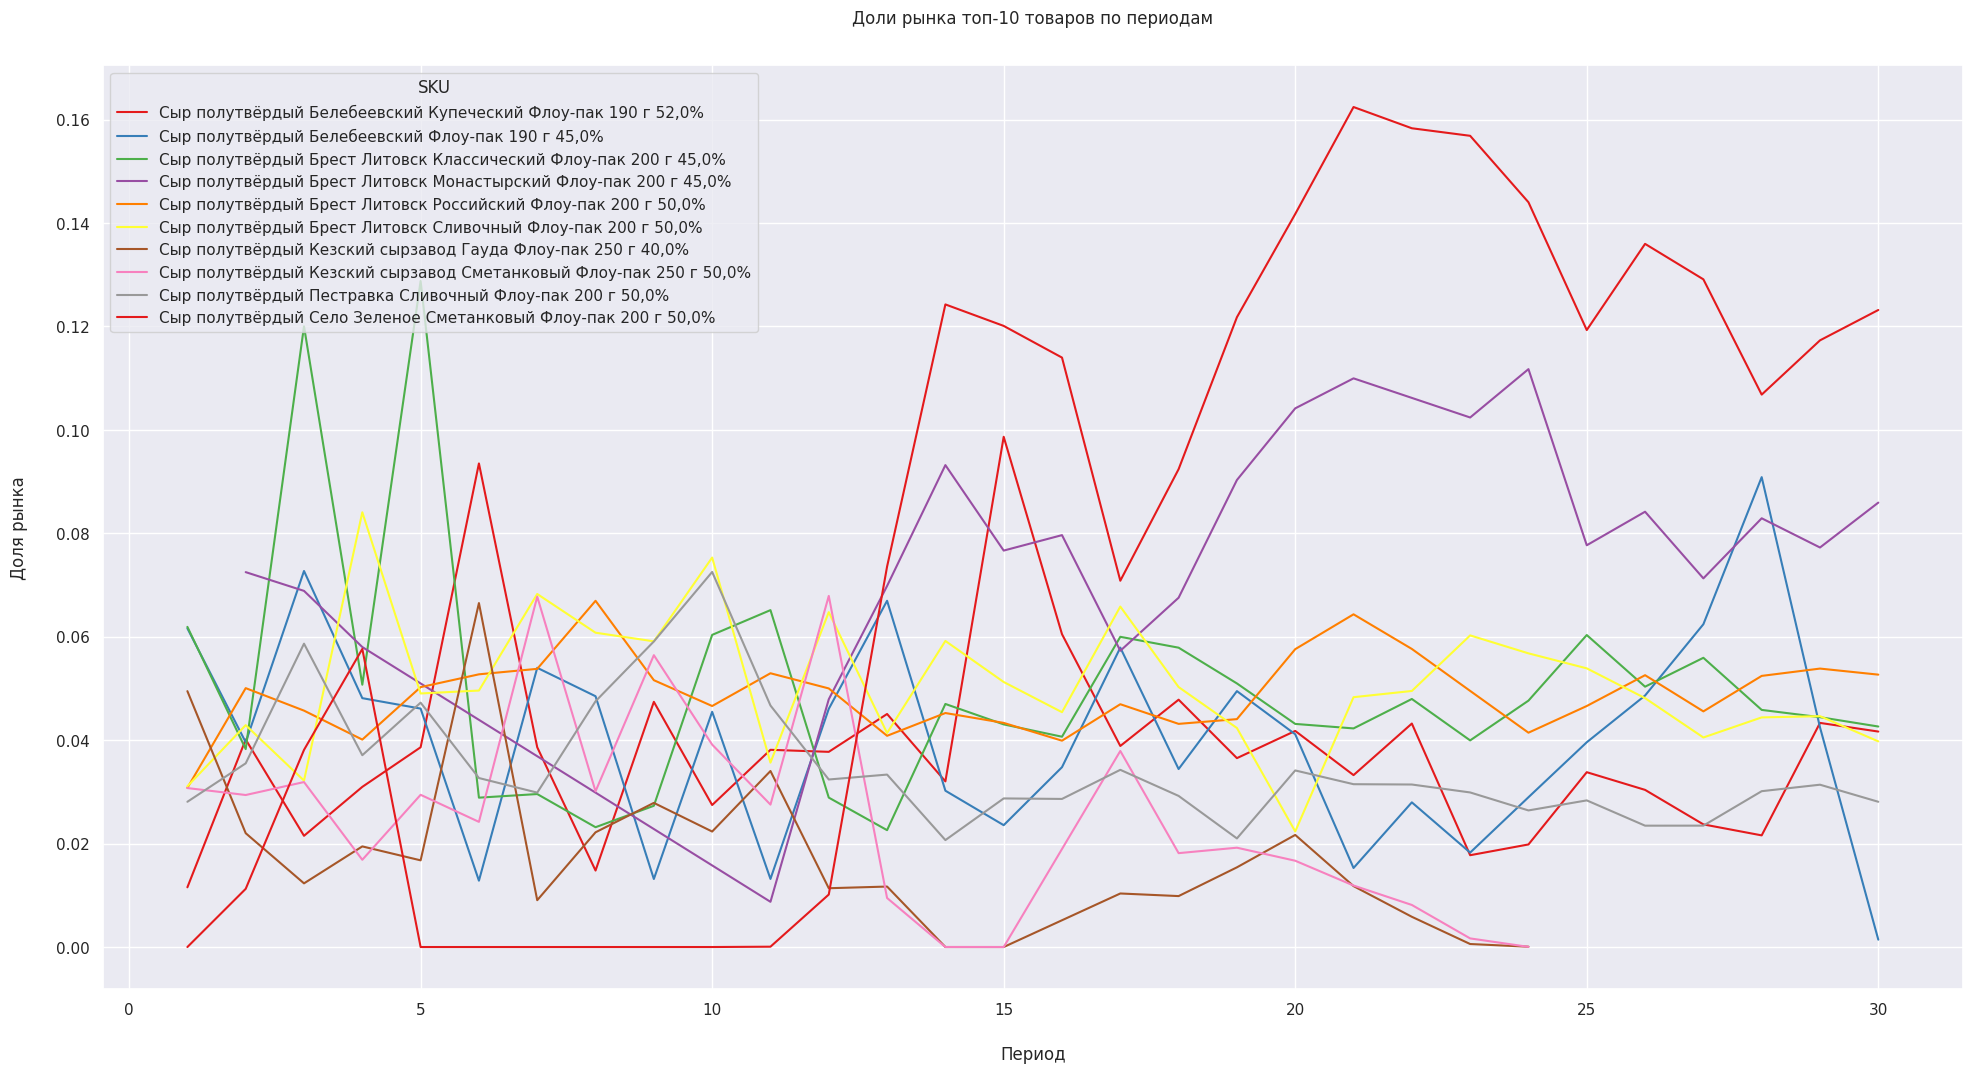

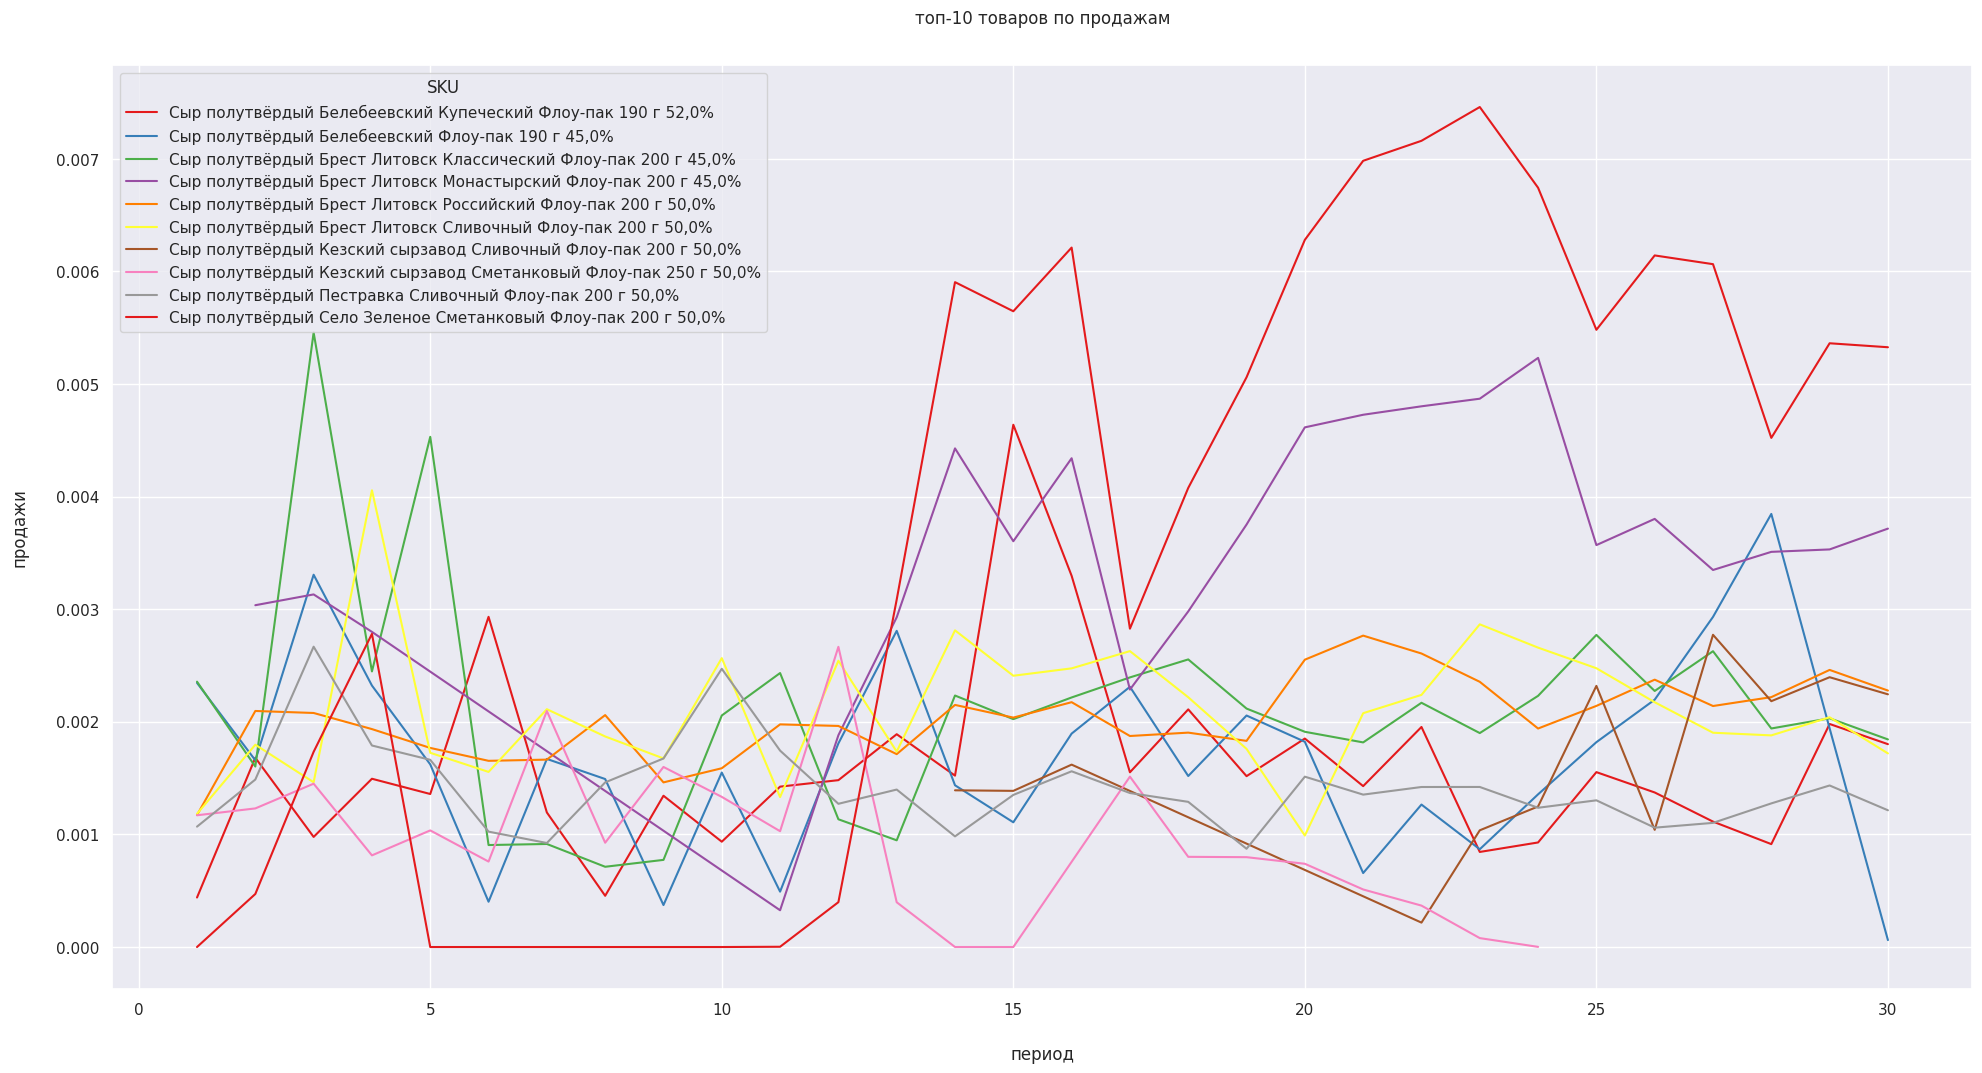

Базовая ску  Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     186.109
Link Function:                     IdentityLink Log Likelihood:                                 -1147.7036
Number of Samples:                          811 AIC:                                             2669.6253
                                                AICc:                                            2782.6368
                                                GCV:                                                1.9861
                                                Scale:                                              1.1874
                                                Pseudo R-Squared:  

<ipython-input-7-2eb0bb479c9d>:356: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from pygam import LinearGAM, s, f
from sklearn.preprocessing import StandardScaler


if 'data' in locals():
    del data
data= df_org_2.copy()


if 2024 in data['Year'].unique().tolist():
  year_search=2024

else:
  year_search=2023


sns.set(style='darkgrid')

# Переименуем столбцы для удобства
data.rename(columns={
    'Month': 'month',
    'Year': 'year',
    'Sku_name': 'SKU',
    'Analytic1': 'Package_Info',
    'Articul8': 'Cheese_Type',
    'Brand': 'Brand',
    'PRICE_PER_UNIT': 'price_per_unit',
    'SALES_VOL': 'sales_volume',
    'SHARE_VOL_PROMO': 'promo_share',
    'SHARE_VOL': 'market_share_observed',
    'SHARE_VOL_SKU':'SHARE_VOL_SKU'
}, inplace=True)


#Создаем переменную 'period' на основе года и месяца
data['period'] = data['year'].astype(str) + '_' + data['month'].astype(str)

# Присваиваем уникальный номер каждому периоду
data['period'] = data['period'].astype('category').cat.codes + 1



# Шаг 1: Посчитаем количество периодов для каждого SKU
period_counts = data.groupby('SKU')['period'].nunique().reset_index()
period_counts.columns = ['SKU', 'period_count']

# Шаг 2: Найдем максимальное количество периодов
max_period_count = period_counts['period_count'].max()

# Шаг 3: Отфильтруем только те SKU, которые продавались в максимальное количество периодов
max_period_skus = period_counts[period_counts['period_count'] == max_period_count]

# Шаг 4: Соединим с исходными данными для получения среднего значения 'er'
grouped = data.groupby('SKU')['er'].mean().reset_index()

# Шаг 5: Оставим только те SKU, которые продавались в максимальное количество периодов
filtered_grouped = grouped[grouped['SKU'].isin(max_period_skus['SKU'])]

# Шаг 6: Найдем SKU с максимальным 'er'
max_sku = filtered_grouped.loc[filtered_grouped['er'].idxmax()]



#Функция для извлечения веса из строки
def extract_weight(package_info):
    import re
    match = re.search(r'(\d+)\s*г', package_info)
    if match:
        return int(match.group(1))
    else:
        return np.nan

# Применение функции к столбцу 'Package_Info'
data['Package_Weight'] = data['Package_Info'].apply(extract_weight)


res_data = data.copy()


# Заполняем пропущенные значения или удаляем строки с пропущенными значениями
data.dropna(inplace=True)
# # Выбираем только топ-10 SKU по максимальной доле рынка
plt.figure(figsize=(24, 12))
top_sku = data.groupby('SKU')['market_share_observed'].max().nlargest(10).index
filtered_data = data[data['SKU'].isin(top_sku)]

sns.lineplot(data=filtered_data, x='period', y='market_share_observed', hue='SKU', palette='Set1')
plt.title('Доли рынка топ-10 товаров по периодам', pad=30)  # Сдвиг заголовка
plt.xlabel('Период', labelpad=20)  # Сдвиг подписи оси X
plt.ylabel('Доля рынка', labelpad=20)  #
plt.show()



plt.figure(figsize=(24, 12))
top_sku = data.groupby('SKU')['er'].max().nlargest(10).index
filtered_data = data[data['SKU'].isin(top_sku)]

sns.lineplot(data=filtered_data, x='period', y='er', hue='SKU', palette='Set1')
plt.title('топ-10 товаров по продажам', pad=30)  # Сдвиг заголовка
plt.xlabel('период', labelpad=20)  # Сдвиг подписи оси X
plt.ylabel('продажи', labelpad=20)  #
plt.show()

# base_sku = 'Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%'
base_sku = max_sku['SKU']
# # base_sku='Сыр полутвёрдый Сыробогатов Королевский стандарт Топленое молоко Флоу-пак 180 г 40,0%'
print(f'Базовая ску  {base_sku}')

if base_sku not in data['SKU'].unique():
    raise ValueError(f"Базовый SKU '{base_sku}' не найден в данных.")

data_categor = pd.DataFrame()
# Преобразуем категориальную переменную в числовую
for cat_i in ['Package_Info', 'Cheese_Type', 'Brand','SKU']:
    data_categor[cat_i]=pd.Categorical(data[cat_i]).codes

data_categor.rename(columns={'SKU':'SKU_cat'},inplace=True)

data_del= data.drop(['Package_Info', 'Cheese_Type', 'Brand'],axis=1)

data = data_del.join(data_categor).copy()

# df_new_sku['Package_Info']=data['Package_Info'].unique()[-1]
# df_new_sku['Cheese_Type']=data['Cheese_Type'].unique()[-1]
# df_new_sku['Brand']=data['Brand'].unique()[-1]
# df_new_sku['SKU_cat']=data['SKU'].unique()[-1]+1
# print(df_new_sku)
# 22/0
# # Данные базового SKU
base_data = data[data['SKU'] == base_sku][['period', 'er']].rename(columns={'er': 'base_er'})

characteristics = ['promo_share','price_per_unit','Package_Info', 'Cheese_Type', 'Brand', 'SKU_cat']

base_data_only = data[data['SKU'] == base_sku][['period'] + characteristics].copy()

# Объединяем с основной таблицей
data = pd.merge(data, base_data, on='period', how='left')

# Удаляем строки, где нет данных базового SKU
data.dropna(subset=['base_er'], inplace=True)

data['log_share_ratio'] = np.log(data['er'] / data['base_er'])

ert = data.copy()

data_cat=data.copy()

base_characteristics = base_data_only.rename(columns=lambda x: 'base_' + x if x != 'period' else x)

# Объединяем базовые характеристики с основной таблицей
data = pd.merge(data_cat, base_characteristics, on='period', how='left', suffixes=('', '_base'))

# Вычисляем разности характеристик
for char in characteristics:
    data['delta_' + char] = data[char] - data['base_' + char]


# from sklearn.preprocessing import MinMaxScaler
data.to_excel('1q.xlsx')


data_test =data[data['year']<=2025].copy()
data =data[data['year']<=2025].copy()
# Установка случайного seed для воспроизводимости
# np.random.seed(42)

# # Случайное перемешивание индексов DataFrame
# indices = np.random.permutation(data.index)



# # Разделение индексов на тренировочные и тестовые
# split_point = int(0.8 * len(data))  # 80% тренировочных данных, 20% тестовых
# train_indices = indices[:split_point]


# # Разделение DataFrame на тренировочные и тестовые данные
# data_train = data.loc[train_indices]

# data_test = data[~data.index.isin(data_train.index)]
# data = data_train.copy()

# model_data = data[data['SKU'] != base_sku].copy()


# X_columns = ['delta_' + char for char in characteristics]

y = data['log_share_ratio']
X =  data[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat']]
y.to_excel('q4.xlsx')

# # # scaler = MinMaxScaler()
scaler = StandardScaler()

# # Applying normalization to the selected columns
normalized_data = pd.DataFrame(scaler.fit_transform(X[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat']]), columns=['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat'])
del_data = X.drop(['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat'],axis=1).reset_index(drop=True)
X=del_data.join(normalized_data)

# # Определим сетку гиперпараметров для поиска
# #_______________________
# from sklearn.model_selection import KFold, cross_val_score

# from pygam import LinearGAM, s, f
# import numpy as np
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error

# # Определим формулу для модели LinearGAM
# lam_values = np.logspace(-3, 3, 10)  # значения регуляризации
# n_splines_values = [5, 10, 20]  # значения для количества сплайнов для s-функций

# # Настраиваем кросс-валидацию
# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# # Списки для сохранения средних ошибок и гиперпараметров
# mean_rmse = []

# print("Начало кросс-валидации для подбора параметров сглаживания...")

# # Кросс-валидация и подбор гиперпараметров
# for n_splines in n_splines_values:
#     for lam in lam_values:
#         fold_rmse = []

#         # Проходим по всем фолдам кросс-валидации
#         for train_idx, val_idx in cv.split(X):
#             # Разбиваем данные на обучающие и тестовые
#             X_train, X_val = X.values[train_idx], X.values[val_idx]
#             y_train, y_val = y.values[train_idx], y.values[val_idx]

#             # Создаем новую модель для каждой итерации
#             gam = LinearGAM(s(0, n_splines=n_splines) + s(1, n_splines=n_splines) + f(2) + f(3) + f(4) + f(5), lam=lam)
#             gam.fit(X_train, y_train)

#             # Прогнозируем на валидационных данных
#             y_pred = gam.predict(X_val)

#             # Считаем RMSE для каждого фолда
#             rmse = np.sqrt(mean_squared_error(y_val, y_pred))
#             fold_rmse.append(rmse)

#         # Сохраняем среднее значение RMSE для текущих гиперпараметров
#         mean_rmse.append({
#             'n_splines': n_splines,
#             'lam': lam,
#             'mean_rmse': np.mean(fold_rmse)
#         })

# # Найдем гиперпараметры с минимальным RMSE
# best_params = min(mean_rmse, key=lambda x: x['mean_rmse'])
# best_n_splines = best_params['n_splines']
# best_lam = best_params['lam']

# print(f"Оптимальное значение n_splines: {best_n_splines}, Оптимальное значение ламбда: {best_lam}")

# # Обучаем модель с оптимальными гиперпараметрами на всех данных
# gam = LinearGAM(s(0, n_splines=best_n_splines) + s(1, n_splines=best_n_splines) + f(2) + f(3) + f(4) + f(5), lam=best_lam)
# gam.fit(X.values, y.values)

# # Прогнозируем систематическую утилиту
# data['V'] = gam.predict(X.values)
# # #_______________________



# # Задаем сетку значений для гиперпараметров
# lam_values = np.logspace(-3, 3, 30)  # значения регуляризации
# n_splines_values = [5, 10, 20,100]  # значения для количества сплайнов для s-функций

# # Список для сохранения ошибок RMSE и гиперпараметров
# mean_rmse = []

# print("Подбор параметров сглаживания без кросс-валидации...")

# # Перебираем значения параметров n_splines и lam
# for n_splines in n_splines_values:
#     for lam in lam_values:
#         # Создаем и обучаем модель с текущими значениями гиперпараметров
#         gam = LinearGAM(s(0, n_splines=n_splines) + s(1, n_splines=n_splines) + f(2) + f(3) + f(4) + f(5), lam=lam)
#         gam.fit(X.values, y.values)

#         # Прогнозируем и вычисляем ошибку RMSE на тех же данных
#         y_pred = gam.predict(X.values)
#         rmse = np.sqrt(mean_squared_error(y.values, y_pred))

#         # Сохраняем значения гиперпараметров и RMSE
#         mean_rmse.append({
#             'n_splines': n_splines,
#             'lam': lam,
#             'rmse': rmse
#         })

# # Выбираем комбинацию параметров с минимальным RMSE
# best_params = min(mean_rmse, key=lambda x: x['rmse'])
# best_n_splines = best_params['n_splines']
# best_lam = best_params['lam']

# print(f"Оптимальное значение n_splines: {best_n_splines}, Оптимальное значение ламбда: {best_lam}")

# # Обучаем модель с оптимальными гиперпараметрами на всех данных
# gam = LinearGAM(s(0, n_splines=best_n_splines) + s(1, n_splines=best_n_splines) + f(2) + f(3) + f(4) + f(5), lam=best_lam)
# gam.fit(X.values, y.values)

# # Прогнозируем систематическую утилиту
# data['V'] = gam.predict(X.values)
# data.loc[data['SKU'] == base_sku, 'V'] = 0
# data['pred_market_share'] = np.exp(data['V']) * data['base_er']

# # #_________________
# gam = LinearGAM(s(0)+s(1)+f(2) + f(3) + f(4)+f(5)).fit(X, y)

# # gam = LinearGAM(f(0) + f(1) + f(2)+s(3)+s(4)).fit(X, y)
# gam.gridsearch(X, y)

# # # #__________
# # # Прогнозируем систематическую утилиту
# data['V'] = gam.predict(X)
# data.loc[data['SKU'] == base_sku, 'V'] = 0
# # Обратное преобразование логарифмического отношения к реальным значениям продаж
# # data['pred_market_share'] = np.exp(data['V']) * data['base_sales_volume']


# # Восстановление предсказанных значений доли продаж SKU
# data['pred_market_share'] = np.exp(data['V']) * data['base_er']
# # #____________________


optimal_n_splines = 100
optimal_lam = 0.01
gam = LinearGAM(
    s(0, n_splines=optimal_n_splines) +
    s(1, n_splines=optimal_n_splines) +
    f(2) +
    f(3) +
    f(4) +
    f(5),
    lam=optimal_lam
)

# # Прогнозируем систематическую утилиту
gam.fit(X.values, y.values)
# gam.gridsearch(X, y)
data['V'] = gam.predict(X)
data.loc[data['SKU'] == base_sku, 'V'] = 0
# Обратное преобразование логарифмического отношения к реальным значениям продаж
data['pred_market_share'] = np.exp(data['V']) * data['base_er']


gam.summary()

In [48]:
true_pred =data.groupby('SKU')['pred_market_share'].sum()
true_pred



SKU
Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%            0.0251221704
Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%              0.0241133810
Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%                   0.0224622683
Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%                    0.0504147747
Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%                    0.0345268140
Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%                               0.0525845334
Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%                 0.0633393443
Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%                       0.0356018790
Сыр полутвёрдый Брест Литовск Маасдам Флоу-пак 200 г 45,0%                      0.0336362930
Сыр полутвёрдый Брест Литовск Монастырский Флоу-пак 200 г 45,0%                 0.0964966236
Сыр полутвёрдый Брест Литовск Российский Флоу-пак 200 г 50,0%                   0.0690546961
Сыр полутвёрдый Брест Литовск Сливочный Флоу-пак 200 г 50,0%                    0.0647388999
Сыр полутвёрдый Кезский сырзавод Гауда Флоу-пак 250 г 40,0%                     0.0100320976
Сыр полутвёрдый Кезский сырзавод Сливочный Флоу-пак 200 г 50,0%                 0.0210401165
Сыр полутвёрдый Кезский сырзавод Сливочный Флоу-пак 250 г 50,0%                 0.0197854184
Сыр полутвёрдый Кезский сырзавод Сметанковый Флоу-пак 250 г 50,0%               0.0114883906
Сыр полутвёрдый Кезский сырзавод Тильзитер Флоу-пак 200 г 50,0%                 0.0141771450
Сыр полутвёрдый Кезский сырзавод Тильзитер Флоу-пак 250 г 50,0%                 0.0125182599
Сыр полутвёрдый Ламбер Флоу-пак 230 г 50,0%                                     0.0350245658
Сыр полутвёрдый Милково Голландский Флоу-пак 200 г 45,0%                        0.0166694317
Сыр полутвёрдый Пестравка Голландский Флоу-пак 200 г 45,0%                      0.0209601985
Сыр полутвёрдый Пестравка Классический Флоу-пак 200 г 45,0%                     0.0175359927
Сыр полутвёрдый Пестравка Российский Флоу-пак 200 г 50,0%                       0.0375079346
Сыр полутвёрдый Пестравка Сливочный Флоу-пак 200 г 50,0%                        0.0445210632
Сыр полутвёрдый Пестравка Тильзитер Флоу-пак 200 г 45,0%                        0.0232340939
Сыр полутвёрдый Радость вкуса Топленое молоко Флоу-пак 200 г 45,0%              0.0171549680
Сыр полутвёрдый Село Зеленое Премиум Гауда Флоу-пак 200 г 40,0%                 0.0204988712
Сыр полутвёрдый Село Зеленое Сметанковый Флоу-пак 200 г 50,0%                   0.0593855593
Сыр полутвёрдый Село Зеленое Фермерский Сливки Флоу-пак 200 г 50,0%             0.0092515291
Сыр полутвёрдый Сыробогатов Король сыров Топленое молоко Флоу-пак 200 г 40,0%   0.0101927494
Name: pred_market_share, dtype: float64

In [11]:
true_pred.sum()


0.9730700629747041

In [12]:
import pandas as pd
mean_org = pd.DataFrame()
mean_org['org_market_share'] = df_org_2.groupby('Sku_name')['er'].sum()
mean_org['org_market_share']

Sku_name
Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%            0.0235569419
Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%              0.0240645255
Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%                   0.0239252927
Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%                    0.0479953545
Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%                    0.0325401255
Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%                               0.0509475132
Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%                 0.0633393443
Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%                       0.0334721190
Сыр полутвёрдый Брест Литовск Маасдам Флоу-пак 200 г 45,0%                      0.0310201965
Сыр полутвёрдый Брест Литовск Монастырский Флоу-пак 200 г 45,0%                 0.0812246093
Сыр полутвёрдый Брест Литовск Российский Флоу-пак 200 г 50,0%                   0.0609436647
Сыр полутвёрдый Брест Литовск Сливочный Флоу-пак 200 г 50,0%                    0.0629440946
Сыр полутвёрдый Кезский сырзавод Гауда Флоу-пак 250 г 40,0%                     0.0149530072
Сыр полутвёрдый Кезский сырзавод Сливочный Флоу-пак 200 г 50,0%                 0.0198592676
Сыр полутвёрдый Кезский сырзавод Сливочный Флоу-пак 250 г 50,0%                 0.0234168969
Сыр полутвёрдый Кезский сырзавод Сметанковый Флоу-пак 250 г 50,0%               0.0213215558
Сыр полутвёрдый Кезский сырзавод Тильзитер Флоу-пак 200 г 50,0%                 0.0131197526
Сыр полутвёрдый Кезский сырзавод Тильзитер Флоу-пак 250 г 50,0%                 0.0204702153
Сыр полутвёрдый Ламбер Флоу-пак 230 г 50,0%                                     0.0306618736
Сыр полутвёрдый Милково Голландский Флоу-пак 200 г 45,0%                        0.0135174223
Сыр полутвёрдый Пестравка Голландский Флоу-пак 200 г 45,0%                      0.0192508948
Сыр полутвёрдый Пестравка Классический Флоу-пак 200 г 45,0%                     0.0165975430
Сыр полутвёрдый Пестравка Российский Флоу-пак 200 г 50,0%                       0.0351388083
Сыр полутвёрдый Пестравка Сливочный Флоу-пак 200 г 50,0%                        0.0424112666
Сыр полутвёрдый Пестравка Тильзитер Флоу-пак 200 г 45,0%                        0.0217086836
Сыр полутвёрдый Радость вкуса Топленое молоко Флоу-пак 200 г 45,0%              0.0175013608
Сыр полутвёрдый Село Зеленое Премиум Гауда Флоу-пак 200 г 40,0%                 0.0194814813
Сыр полутвёрдый Село Зеленое Сметанковый Флоу-пак 200 г 50,0%                   0.1057341542
Сыр полутвёрдый Село Зеленое Фермерский Сливки Флоу-пак 200 г 50,0%             0.0133142313
Сыр полутвёрдый Сыробогатов Король сыров Топленое молоко Флоу-пак 200 г 40,0%   0.0155678030
Name: org_market_share, dtype: float64

In [13]:
mean_org['org_market_share'].sum()

0.9999999999999997

In [14]:
# mean_market_shares
# mean_org

# market_share_before,new_df
from sklearn.metrics import mean_absolute_error, r2_score
# Расчет MAE
mae = mean_absolute_error(mean_org['org_market_share'].values,true_pred.to_frame()['pred_market_share'].values)
print(f'MAE: {mae:.2f}')

# Расчет R²
r2 = r2_score(mean_org['org_market_share'].values,true_pred.to_frame()['pred_market_share'].values)
# print(f'R²: {r2:.2f}')

# Расчет WAPE
wape = sum(abs(mean_org['org_market_share'].values - true_pred.to_frame()['pred_market_share'].values) / sum(mean_org['org_market_share'].values))
print(f'WAPE: {wape:.2f}')

# Количество наблюдений и количество предикторов
n = len(mean_org)  # количество наблюдений
p = 1  # количество предикторов (в данном случае это предсказанная доля рынка)

# Вычисление скорректированного R²
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Вывод значений R² и R²_adj
print(f'R²: {r2:.2f}')
print(f'R² Adjusted: {r2_adj:.2f}')

MAE: 0.00
WAPE: 0.14
R²: 0.81
R² Adjusted: 0.80


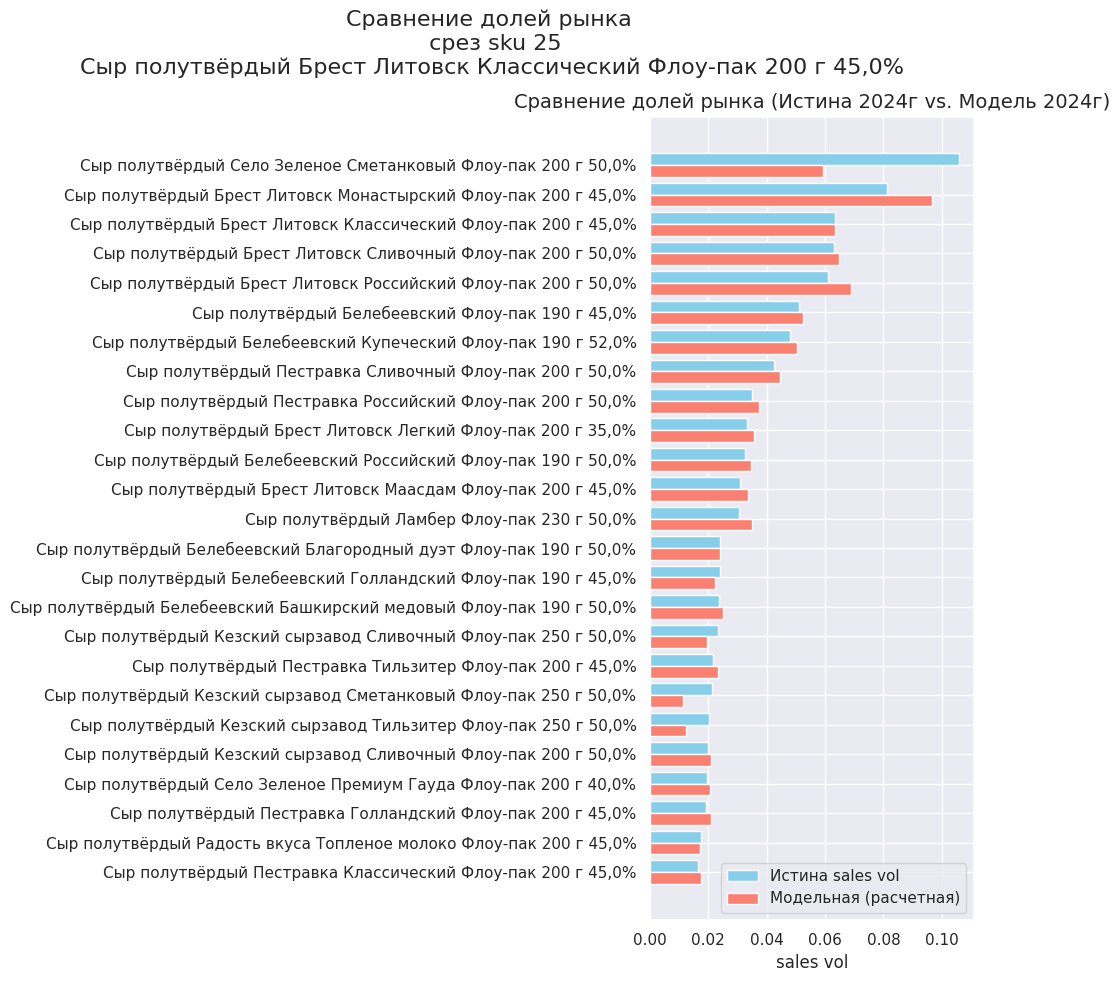

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='Истина sales vol')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='Модельная (расчетная)')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('sales vol')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax

# Извлечение данных для построения диаграмм
sizes_org = mean_org['org_market_share'].values
sizes_pred = true_pred.to_frame()['pred_market_share'].values
labels_org = mean_org.index.values
top_25=25
# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 10))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка (Истина 2024г vs. Модель 2024г)', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка \n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()


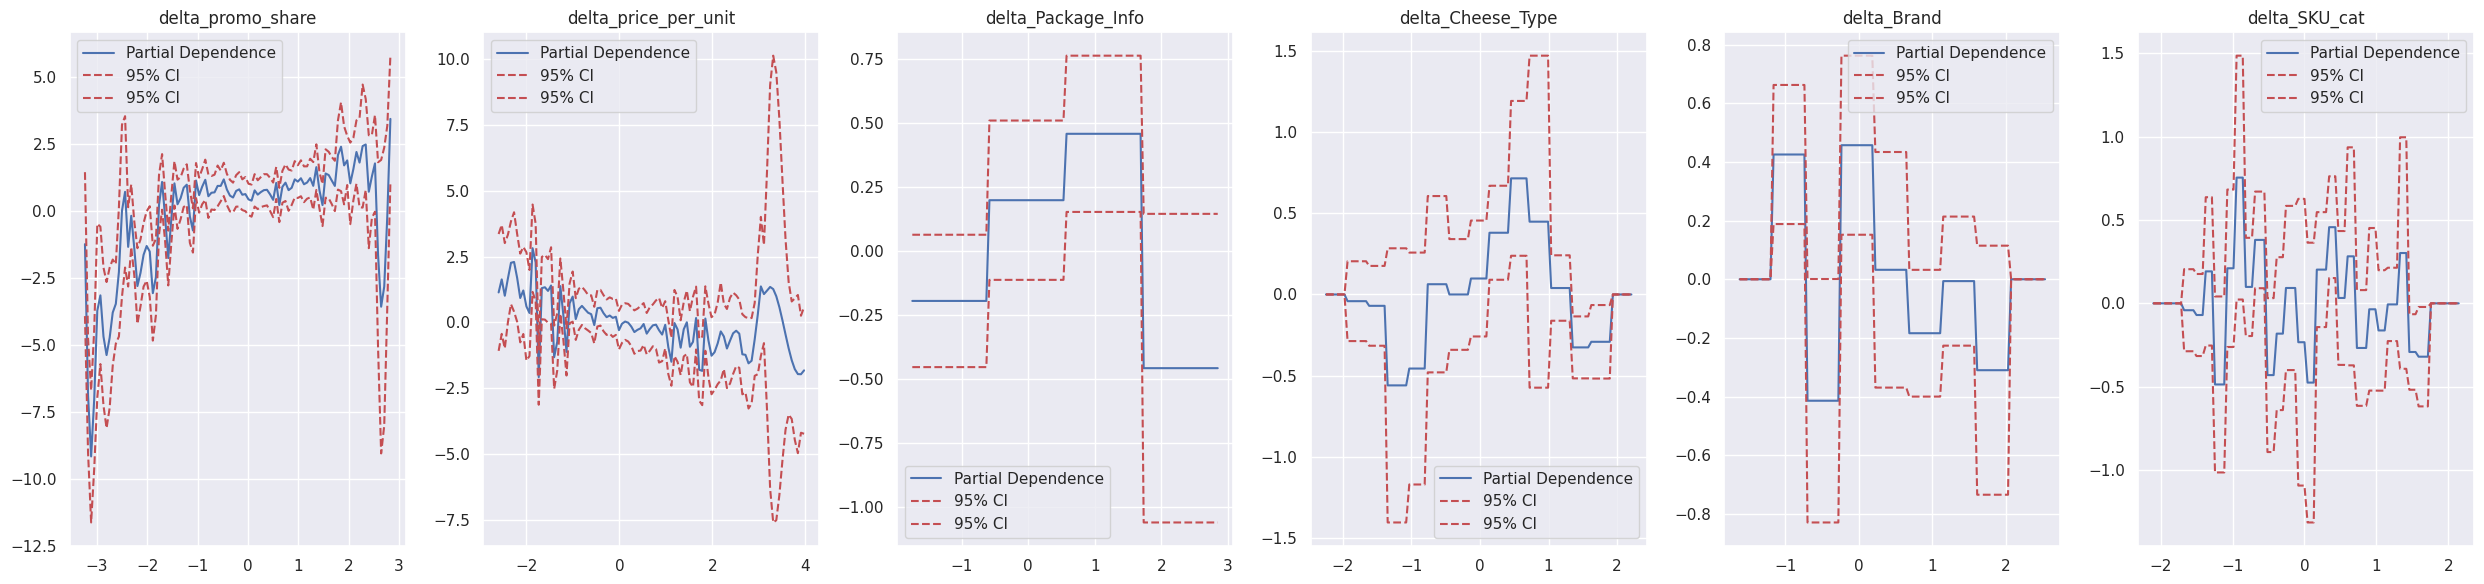

In [16]:
from pygam import LinearGAM, s, f
from pygam.datasets import wage

titles = ['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat']

# Создание подграфиков с заданным размером фигуры
fig, axs = plt.subplots(1, 6, figsize=(25, 6))  # Ширина 25 дюймов и высота 5 дюймов

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pd = gam.partial_dependence(term=i, X=XX)
    ppd = gam.partial_dependence(term=i, X=XX, width=.95)

    ax.plot(XX[:, i], pd, label='Partial Dependence')
    ax.plot(XX[:, i], ppd[1], c='r', ls='--', label='95% CI')


    ax.set_title(titles[i])
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
X.describe()

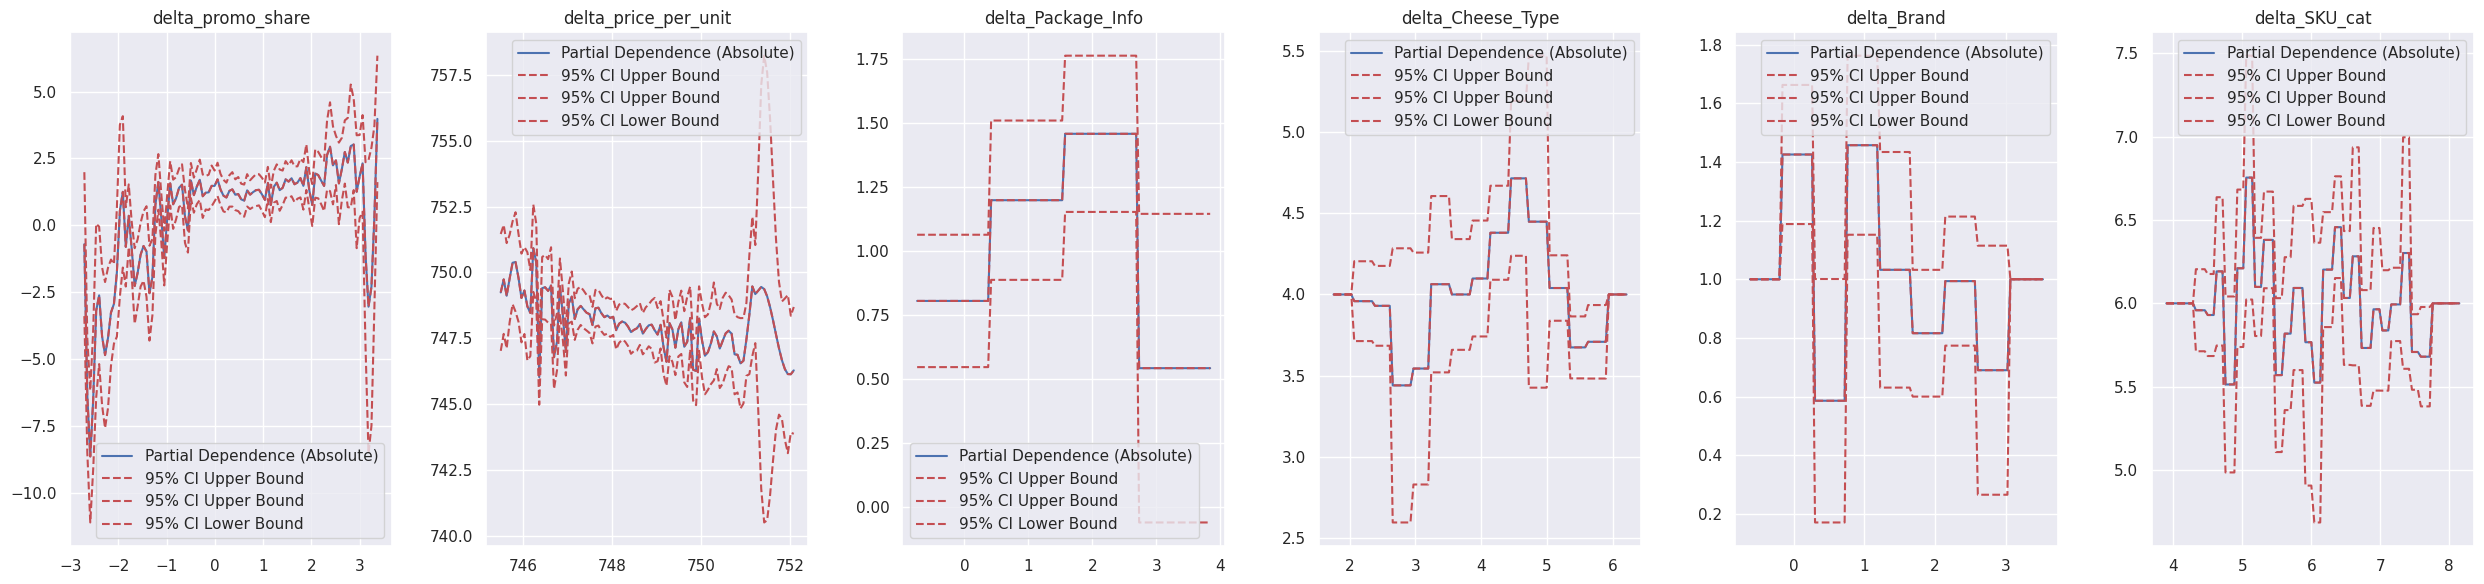

In [17]:
# Допустим, у нас есть базовые значения для каждой характеристики
# base_values = {
#     'delta_promo_share': data['base_promo_share'],
#     'delta_price_per_unit': data['base_price_per_unit'],
#     'delta_Package_Info': data['base_Package_Info'],
#     'delta_Cheese_Type': data['base_Cheese_Type'],
#     'delta_Brand': data['base_Brand'],
#     'delta_SKU_cat': data['base_SKU_cat']
# }
# Пример, где base_values содержит одно значение на характеристику
base_values = {
    'delta_promo_share': data['base_promo_share'].iloc[0],
    'delta_price_per_unit': data['base_price_per_unit'].iloc[0],
    'delta_Package_Info': data['base_Package_Info'].iloc[0],
    'delta_Cheese_Type': data['base_Cheese_Type'].iloc[0],
    'delta_Brand': data['base_Brand'].iloc[0],
    'delta_SKU_cat': data['base_SKU_cat'].iloc[0]
}



import matplotlib.pyplot as plt

# Проверяем количество подграфиков
fig, axs = plt.subplots(1, 6, figsize=(25, 6))  # Создаем 6 подграфиков

for i, ax in enumerate(axs):
    # Проверяем, что i не превышает число признаков
    XX = gam.generate_X_grid(term=i)

    pd = gam.partial_dependence(term=i, X=XX)
    ppd = gam.partial_dependence(term=i, X=XX, width=.95)

    # Преобразование к абсолютным значениям
    XX_absolute = XX[:, i] + base_values[titles[i]]
    pd_absolute = pd + base_values[titles[i]]
    ppd_absolute_lower = ppd[0] + base_values[titles[i]]
    ppd_absolute_upper = ppd[1] + base_values[titles[i]]

    # Построение графика
    ax.plot(XX_absolute, pd_absolute, label='Partial Dependence (Absolute)')
    ax.plot(XX_absolute, ppd_absolute_upper, c='r', ls='--', label='95% CI Upper Bound')
    ax.plot(XX_absolute, ppd_absolute_lower, c='r', ls='--', label='95% CI Lower Bound')

    ax.set_title(titles[i])
    ax.legend()

plt.tight_layout()  # Упорядочиваем подграфики
plt.show()


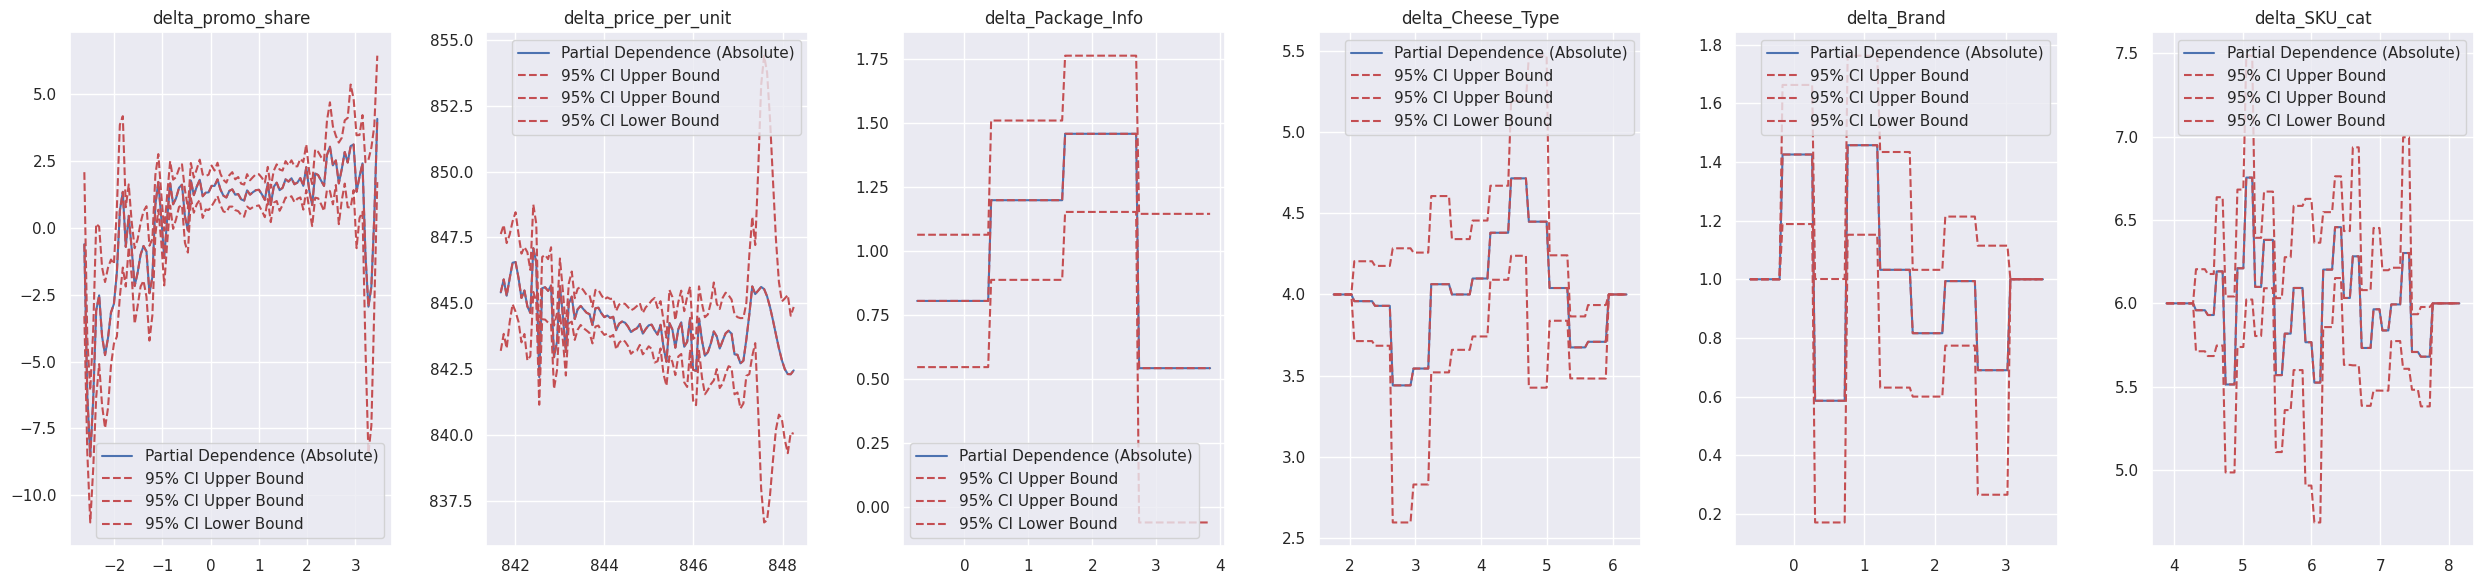

In [18]:
# Допустим, у нас есть базовые значения для каждой характеристики
# base_values = {
#     'delta_promo_share': data['base_promo_share'],
#     'delta_price_per_unit': data['base_price_per_unit'],
#     'delta_Package_Info': data['base_Package_Info'],
#     'delta_Cheese_Type': data['base_Cheese_Type'],
#     'delta_Brand': data['base_Brand'],
#     'delta_SKU_cat': data['base_SKU_cat']
# }
# Пример, где base_values содержит одно значение на характеристику
base_values = {
    'delta_promo_share': data['base_promo_share'].mean(),
    'delta_price_per_unit': data['base_price_per_unit'].mean(),
    'delta_Package_Info': data['base_Package_Info'].mean(),
    'delta_Cheese_Type': data['base_Cheese_Type'].mean(),
    'delta_Brand': data['base_Brand'].mean(),
    'delta_SKU_cat': data['base_SKU_cat'].mean()
}



import matplotlib.pyplot as plt

# Проверяем количество подграфиков
fig, axs = plt.subplots(1, 6, figsize=(25, 6))  # Создаем 6 подграфиков

for i, ax in enumerate(axs):
    # Проверяем, что i не превышает число признаков
    XX = gam.generate_X_grid(term=i)

    pd = gam.partial_dependence(term=i, X=XX)
    ppd = gam.partial_dependence(term=i, X=XX, width=.95)

    # Преобразование к абсолютным значениям
    XX_absolute = XX[:, i] + base_values[titles[i]]
    pd_absolute = pd + base_values[titles[i]]
    ppd_absolute_lower = ppd[0] + base_values[titles[i]]
    ppd_absolute_upper = ppd[1] + base_values[titles[i]]

    # Построение графика
    ax.plot(XX_absolute, pd_absolute, label='Partial Dependence (Absolute)')
    ax.plot(XX_absolute, ppd_absolute_upper, c='r', ls='--', label='95% CI Upper Bound')
    ax.plot(XX_absolute, ppd_absolute_lower, c='r', ls='--', label='95% CI Lower Bound')

    ax.set_title(titles[i])
    ax.legend()

plt.tight_layout()  # Упорядочиваем подграфики
plt.show()


In [19]:
ert['Cheese_Type'].unique()

array([ 0,  1,  3,  5,  9,  4,  6,  7,  8, 10,  2, 11, 12, 13, 14],
      dtype=int8)

In [20]:
ert[ert['Brand']==1]

index  month  year                                                SKU  \
180    445      1  2022  Сыр полутвёрдый Брест Литовск Классический Фло...   
181    446      1  2023  Сыр полутвёрдый Брест Литовск Классический Фло...   
182    447      1  2024  Сыр полутвёрдый Брест Литовск Классический Фло...   
183    448      2  2022  Сыр полутвёрдый Брест Литовск Классический Фло...   
184    449      2  2023  Сыр полутвёрдый Брест Литовск Классический Фло...   
..     ...    ...   ...                                                ...   
348    613     10  2023  Сыр полутвёрдый Брест Литовск Сливочный Флоу-п...   
349    614     11  2022  Сыр полутвёрдый Брест Литовск Сливочный Флоу-п...   
350    615     11  2023  Сыр полутвёрдый Брест Литовск Сливочный Флоу-п...   
351    616     12  2022  Сыр полутвёрдый Брест Литовск Сливочный Флоу-п...   
352    617     12  2023  Сыр полутвёрдый Брест Литовск Сливочный Флоу-п...   

     price_per_unit     sales_volume  promo_share  market_share_observed  \
180  748.1042140369 24347.2000000000 0.5351400982           0.0619097665   
181  951.5676116751  9791.8000000000 0.4015439449           0.0225988064   
182  820.4199418938 28637.2000000000 0.6262853910           0.0603302452   
183  636.3991581075 46811.2000000001 0.8489124825           0.1287851151   
184  822.2840540868 24738.0000000000 0.8240229606           0.0599876184   
..              ...              ...          ...                    ...   
348  820.4256666437 29056.0000000002 0.6705438119           0.0591849546   
349  891.1809297034 15118.8000000000 0.5833386248           0.0321839241   
350  831.2621626182 24890.2000000000 0.6534024234           0.0512489932   
351  747.7993921966 41905.0000000001 0.8872511633           0.0840648392   
352  895.0256627477 25567.8000000001 0.4703636605           0.0454104506   

              er  period  Package_Weight  Package_Info  Cheese_Type  Brand  \
180 0.0023569000       1             200             1            4      1   
181 0.0009478828      13             200             1            4      1   
182 0.0027721880      25             200             1            4      1   
183 0.0045314992       5             200             1            4      1   
184 0.0023947309      17             200             1            4      1   
..           ...     ...             ...           ...          ...    ...   
348 0.0028127294      14             200             1           10      1   
349 0.0014635564       3             200             1           10      1   
350 0.0024094644      15             200             1           10      1   
351 0.0040565607       4             200             1           10      1   
352 0.0024750586      16             200             1           10      1   

     SKU_cat      base_er  log_share_ratio  
180        6 0.0023569000     0.0000000000  
181        6 0.0009478828     0.0000000000  
182        6 0.0027721880     0.0000000000  
183        6 0.0045314992     0.0000000000  
184        6 0.0023947309     0.0000000000  
..       ...          ...              ...  
348       11 0.0022337850     0.2304578874  
349       11 0.0054578141    -1.3161790305  
350       11 0.0020240113     0.1743231596  
351       11 0.0024478761     0.5051147219  
352       11 0.0022165539     0.1103103803  

[173 rows x 17 columns]

In [21]:
y_pred_sku3 = gam.predict(X_new_sku)
y_pred_sku3

array([-1.49673849, -1.87184481, -1.50040207, -2.13201783, -2.04447828,
       -2.89659555, -3.98219997, -1.90829685, -1.9743733 , -1.72726125,
       -2.02812724, -1.93807057])

In [22]:
df_new_sku['new_pred_market_share']=y_pred_sku3
df_new_sku

index  month  year        SKU  price_per_unit     sales_volume  \
0    1109      1  2024  Новый СКУ  752.3992329074 25960.5999999999   
1    1110      2  2024  Новый СКУ  810.1444620106 11752.9999999999   
2    1111      3  2024  Новый СКУ  710.4420301035 24647.8000000001   
3    1112      4  2024  Новый СКУ  800.7410469663 21556.6000000001   
4    1113      5  2024  Новый СКУ  900.4006285548 25755.2000000003   
5    1114      6  2024  Новый СКУ  768.2739047742 25187.0000000001   
6    1115      7  2023  Новый СКУ  840.0398723442  2140.4000000000   
7    1116      8  2023  Новый СКУ  780.7746316458 11709.7999999999   
8    1117      9  2023  Новый СКУ  749.8583629286 13896.2000000001   
9    1118     10  2023  Новый СКУ  777.0525105708 14379.2000000001   
10   1119     11  2023  Новый СКУ  757.2765629580 15328.6000000000   
11   1120     12  2023  Новый СКУ  789.8209083739 15735.4000000000   

    promo_share           er  period  Package_Weight  ...  base_Cheese_Type  \
0  0.8968625160 0.0504780102      25             200  ...                 4   
1  0.3597675067 0.0230416386      26             200  ...                 4   
2  0.8005644412 0.0590358542      27             200  ...                 4   
3  0.6353175124 0.0515783573      28             200  ...                 4   
4  0.6996620508 0.0524252002      29             200  ...                 4   
5  0.6671762626 0.0519035975      30             200  ...                 4   
6  0.1417653098 0.0047952286      22             200  ...                 4   
7  0.6085915703 0.0217983141      23             200  ...                 4   
8  0.7036859695 0.0266606678      24             200  ...                 4   
9  0.6880229776 0.0292893825      14             200  ...                 4   
10 0.6859259802 0.0295026285      15             200  ...                 4   
11 0.6695616478 0.0297234043      16             200  ...                 4   

    base_Brand  base_SKU_cat  delta_promo_share  delta_price_per_unit  \
0            1             6       0.2705771250        -68.0207089864   
1            1             6      -0.1825063272        -38.5483518382   
2            1             6       0.2957782200       -148.2556250354   
3            1             6      -0.0022037818       -112.7936596025   
4            1             6       0.0728682395        -11.3380137217   
5            1             6       0.1576637576       -178.4495402396   
6            1             6      -0.5757680676          1.3791920351   
7            1             6      -0.0761753242        -69.9177078650   
8            1             6      -0.0798481923        -69.6063301661   
9            1             6      -0.0507505648        -38.8095711266   
10           1             6       0.0428366477        -91.4059459858   
11           1             6       0.0575271810        -65.3467442854   

    delta_Package_Info  delta_Cheese_Type  delta_Brand  delta_SKU_cat  \
0                    2                 10            7             24   
1                    2                 10            7             24   
2                    2                 10            7             24   
3                    2                 10            7             24   
4                    2                 10            7             24   
5                    2                 10            7             24   
6                    2                 10            7             24   
7                    2                 10            7             24   
8                    2                 10            7             24   
9                    2                 10            7             24   
10                   2                 10            7             24   
11                   2                 10            7             24   

    new_pred_market_share  
0           -1.4967384946  
1           -1.8718448145  
2           -1.5004020707  
3           -2.1320178259  
4           -2.0444782825

In [23]:
data['new_pred_market_share']=data['V']
data.copy()

index  month  year                                                SKU  \
0       78      1  2022  Сыр полутвёрдый Белебеевский Башкирский медовы...   
1       79      1  2023  Сыр полутвёрдый Белебеевский Башкирский медовы...   
2       80      1  2024  Сыр полутвёрдый Белебеевский Башкирский медовы...   
3       81      2  2022  Сыр полутвёрдый Белебеевский Башкирский медовы...   
4       82      2  2023  Сыр полутвёрдый Белебеевский Башкирский медовы...   
..     ...    ...   ...                                                ...   
806   2519     10  2023  Сыр полутвёрдый Сыробогатов Король сыров Топле...   
807   2520     11  2022  Сыр полутвёрдый Сыробогатов Король сыров Топле...   
808   2521     11  2023  Сыр полутвёрдый Сыробогатов Король сыров Топле...   
809   2522     12  2022  Сыр полутвёрдый Сыробогатов Король сыров Топле...   
810   2523     12  2023  Сыр полутвёрдый Сыробогатов Король сыров Топле...   

     price_per_unit     sales_volume  promo_share  market_share_observed  \
0    745.1327929671 11639.0199999999 0.7439238871           0.0295955597   
1    860.0374076400 11560.7400000004 0.8964294673           0.0266813993   
2    843.5377182644  6448.6000000000 0.7812954750           0.0135853232   
3    851.4125058451  2694.5800000000 0.4483400010           0.0074132215   
4    873.3353889592  6615.9899999996 0.8532585448           0.0160432324   
..              ...              ...          ...                    ...   
806  737.8963487751 13176.3999999999 0.3986265596           0.0268393666   
807  853.9226918126  5127.4000000000 0.7522795179           0.0109148777   
808  738.5716535624  8267.0000000000 0.3698144430           0.0170217767   
809  866.0333343674  6446.8000000000 0.7113436123           0.0129328053   
810  660.0515076754   729.6000000000 0.6522409539           0.0012958278   

              er  period  ...  base_SKU_cat  delta_promo_share  \
0   0.0011267006       1  ...             6       0.2087837888   
1   0.0011191228      13  ...             6       0.4948855224   
2   0.0006242486      25  ...             6       0.1550100840   
3   0.0002608454       5  ...             6      -0.4005724814   
4   0.0006404526      17  ...             6       0.0292355842   
..           ...     ...  ...           ...                ...   
806 0.0012755248      14  ...             6      -0.3401469828   
807 0.0004963515       3  ...             6      -0.1870142945   
808 0.0008002765      15  ...             6      -0.2732748896   
809 0.0006240743       4  ...             6       0.0935957973   
810 0.0000706280      16  ...             6       0.0402064872   

     delta_price_per_unit  delta_Package_Info  delta_Cheese_Type  delta_Brand  \
0           -2.9714210698                  -1                 -4           -1   
1          -91.5302040351                  -1                 -4           -1   
2           23.1177763707                  -1                 -4           -1   
3          215.0133477376                  -1                 -4           -1   
4           51.0513348724                  -1                 -4           -1   
..                    ...                 ...                ...          ...   
806        -77.9657329223                   0                  9            7   
807        264.6831616229                   0                  9            7   
808       -110.1108553814                   0                  9            7   
809         71.2703249159                   0                  9            7   
810       -195.1161449838                   0                  9            7   

     delta_SKU_cat             V  pred_market_share  new_pred_market_share  
0               -6 -0.7865472724       0.0010733664          -0.7865472724  
1               -6 -0.0228504821       0.0009264689          -0.0228504821  
2               -6 -1.8159795318       0.0004509753          -1.8159795318  
3               -6 -3.0605091565       0.0002123634          -3.0605091565  
4   

In [29]:
# Объединяем предсказания
import pandas as pd
prediction_combined_df = pd.concat([data[['SKU','period','new_pred_market_share']], df_new_sku[['SKU','period','new_pred_market_share']]], ignore_index=True)
prediction_combined_df

SKU  period  \
0    Сыр полутвёрдый Белебеевский Башкирский медовы...       1   
1    Сыр полутвёрдый Белебеевский Башкирский медовы...      13   
2    Сыр полутвёрдый Белебеевский Башкирский медовы...      25   
3    Сыр полутвёрдый Белебеевский Башкирский медовы...       5   
4    Сыр полутвёрдый Белебеевский Башкирский медовы...      17   
..                                                 ...     ...   
818                                          Новый СКУ      23   
819                                          Новый СКУ      24   
820                                          Новый СКУ      14   
821                                          Новый СКУ      15   
822                                          Новый СКУ      16   

     new_pred_market_share  
0            -0.7865472724  
1            -0.0228504821  
2            -1.8159795318  
3            -3.0605091565  
4            -1.2917779812  
..                     ...  
818          -1.9082968545  
819          -1.9743733025  
820          -1.7272612464  
821          -2.0281272384  
822          -1.9380705665  

[823 rows x 3 columns]

In [30]:
# Пивотируем данные для получения матрицы утилит
utilities_df = prediction_combined_df.pivot(index='period', columns='SKU', values='new_pred_market_share')
utilities_df

SKU        Новый СКУ  \
period                 
1                NaN   
2                NaN   
3                NaN   
4                NaN   
5                NaN   
6                NaN   
7                NaN   
8                NaN   
9                NaN   
10               NaN   
11               NaN   
12               NaN   
13               NaN   
14     -1.7272612464   
15     -2.0281272384   
16     -1.9380705665   
17               NaN   
18               NaN   
19               NaN   
20               NaN   
21               NaN   
22     -3.9821999653   
23     -1.9082968545   
24     -1.9743733025   
25     -1.4967384946   
26     -1.8718448145   
27     -1.5004020707   
28     -2.1320178259   
29     -2.0444782825   
30     -2.8965955477   

SKU     Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%  \
period                                                                         
1                                           -0.7865472724                      
2                                           -1.0006784804                      
3                                           -1.9803277400                      
4                                           -0.8252919499                      
5                                           -3.0605091565                      
6                                           -0.0132684070                      
7                                           -0.5024687383                      
8                                           -0.3365732240                      
9                                           -0.9795031226                      
10                                          -1.5095824164                      
11                                          -2.3510639783                      
12                                          -0.9492405240                      
13                                          -0.0228504821                      
14                                          -1.3854199983                      
15                                          -1.0758733466                      
16                                          -1.1391418484                      
17                                          -1.2917779812                      
18                                          -1.1461504396                      
19                                          -1.0420391945                      
20                                          -0.0236405484                      
21                                          -0.0017122962                      
22                                          -0.5070010599                      
23                                          -1.0004930808                      
24                                          -1.4244363114                      
25                                          -1.8159795318                      
26                                          -0.4708374860                      
27                                          -1.4186221080                      
28                                          -0.2461582643                      
29                                          -0.4315921264                      
30                                          -0.2908688706                      

SKU     Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%  \
period                                                                       
1                                           -0.9049113956                    
2                                           -2.0523472475                    
3                                           -1.8480873826                    
4                                           -1.5419382618                    
5                                           -1.0971988309                    
6                                           -0.8170648329                    
7                                           -0

In [31]:
# Заменяем NaN на 0 (если какие-то периоды отсутствуют)
utilities_df = utilities_df.fillna(0)
utilities_df

SKU        Новый СКУ  \
period                 
1       0.0000000000   
2       0.0000000000   
3       0.0000000000   
4       0.0000000000   
5       0.0000000000   
6       0.0000000000   
7       0.0000000000   
8       0.0000000000   
9       0.0000000000   
10      0.0000000000   
11      0.0000000000   
12      0.0000000000   
13      0.0000000000   
14     -1.7272612464   
15     -2.0281272384   
16     -1.9380705665   
17      0.0000000000   
18      0.0000000000   
19      0.0000000000   
20      0.0000000000   
21      0.0000000000   
22     -3.9821999653   
23     -1.9082968545   
24     -1.9743733025   
25     -1.4967384946   
26     -1.8718448145   
27     -1.5004020707   
28     -2.1320178259   
29     -2.0444782825   
30     -2.8965955477   

SKU     Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%  \
period                                                                         
1                                           -0.7865472724                      
2                                           -1.0006784804                      
3                                           -1.9803277400                      
4                                           -0.8252919499                      
5                                           -3.0605091565                      
6                                           -0.0132684070                      
7                                           -0.5024687383                      
8                                           -0.3365732240                      
9                                           -0.9795031226                      
10                                          -1.5095824164                      
11                                          -2.3510639783                      
12                                          -0.9492405240                      
13                                          -0.0228504821                      
14                                          -1.3854199983                      
15                                          -1.0758733466                      
16                                          -1.1391418484                      
17                                          -1.2917779812                      
18                                          -1.1461504396                      
19                                          -1.0420391945                      
20                                          -0.0236405484                      
21                                          -0.0017122962                      
22                                          -0.5070010599                      
23                                          -1.0004930808                      
24                                          -1.4244363114                      
25                                          -1.8159795318                      
26                                          -0.4708374860                      
27                                          -1.4186221080                      
28                                          -0.2461582643                      
29                                          -0.4315921264                      
30                                          -0.2908688706                      

SKU     Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%  \
period                                                                       
1                                           -0.9049113956                    
2                                           -2.0523472475                    
3                                           -1.8480873826                    
4                                           -1.5419382618                    
5                                           -1.0971988309                    
6                                           -0.8170648329                    
7                                           -0

In [32]:
# Применяем функцию softmax для получения долей рынка
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

# Преобразуем утилиты в numpy array
utilities_array = utilities_df.values
# Применяем softmax для получения новых долей рынка
market_shares_new = softmax(utilities_array)

# Создаем DataFrame для новых долей рынка
market_shares_new_df = pd.DataFrame(market_shares_new,columns=utilities_df.columns.tolist())
market_shares_new_df['period'] = utilities_df.index
market_shares_new_df


Новый СКУ  \
0  0.0545850892   
1  0.0409233785   
2  0.0924166067   
3  0.0522903819   
4  0.0861482269   
5  0.0221559883   
6  0.0360978498   
7  0.0247950801   
8  0.0348572859   
9  0.0760939535   
10 0.0829207455   
11 0.0379558468   
12 0.0210674619   
13 0.0107112874   
14 0.0067558078   
15 0.0067945165   
16 0.0616750964   
17 0.0566914996   
18 0.0604440189   
19 0.0512116337   
20 0.0495454919   
21 0.0013454234   
22 0.0078048389   
23 0.0091061521   
24 0.0122280516   
25 0.0072570341   
26 0.0099144885   
27 0.0053957157   
28 0.0056085453   
29 0.0023749120   

    Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%  \
0                                        0.0248588414                      
1                                        0.0150446586                      
2                                        0.0127557092                      
3                                        0.0229087859                      
4                                        0.0040372357                      
5                                        0.0218639553                      
6                                        0.0218404677                      
7                                        0.0177089830                      
8                                        0.0130888282                      
9                                        0.0168169346                      
10                                       0.0078996725                      
11                                       0.0146902357                      
12                                       0.0205915187                      
13                                       0.0150765316                      
14                                       0.0175079742                      
15                                       0.0151052839                      
16                                       0.0169471935                      
17                                       0.0180198484                      
18                                       0.0213207001                      
19                                       0.0500151610                      
20                                       0.0494607279                      
21                                       0.0434628970                      
22                                       0.0193471996                      
23                                       0.0157822711                      
24                                       0.0088861296                      
25                                       0.0294583839                      
26                                       0.0107593714                      
27                                       0.0355686565                      
28                                       0.0281395918                      
29                                       0.0321588303                      

    Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%  \
0                                        0.0220839115                    
1                                        0.0052559158                    
2                                        0.0145591448                    
3                                        0.0111883627                    
4                                        0.0287566933                    
5                                        0.0097868826                    
6                                        0.0135482052                    
7                                        0.0565883271                    
8                                        0.0161339313                    
9                                        0.0097397983                    
10                                       0.0070404376                    
11                                       0.0211916646                    
12                                       0.0143514999                    
13                     

In [33]:
# Преобразуем DataFrame для визуализации
market_shares_new_melted = pd.melt(market_shares_new_df, id_vars='period', value_vars=utilities_df.columns.tolist(), var_name='SKU', value_name='market_share')
market_shares_new_melted

period                                                SKU  market_share
0         1                                          Новый СКУ  0.0545850892
1         2                                          Новый СКУ  0.0409233785
2         3                                          Новый СКУ  0.0924166067
3         4                                          Новый СКУ  0.0522903819
4         5                                          Новый СКУ  0.0861482269
..      ...                                                ...           ...
925      26  Сыр полутвёрдый Сыробогатов Король сыров Топле...  0.0006022783
926      27  Сыр полутвёрдый Сыробогатов Король сыров Топле...  0.0444515236
927      28  Сыр полутвёрдый Сыробогатов Король сыров Топле...  0.0454959394
928      29  Сыр полутвёрдый Сыробогатов Король сыров Топле...  0.0433267259
929      30  Сыр полутвёрдый Сыробогатов Король сыров Топле...  0.0430153033

[930 rows x 3 columns]

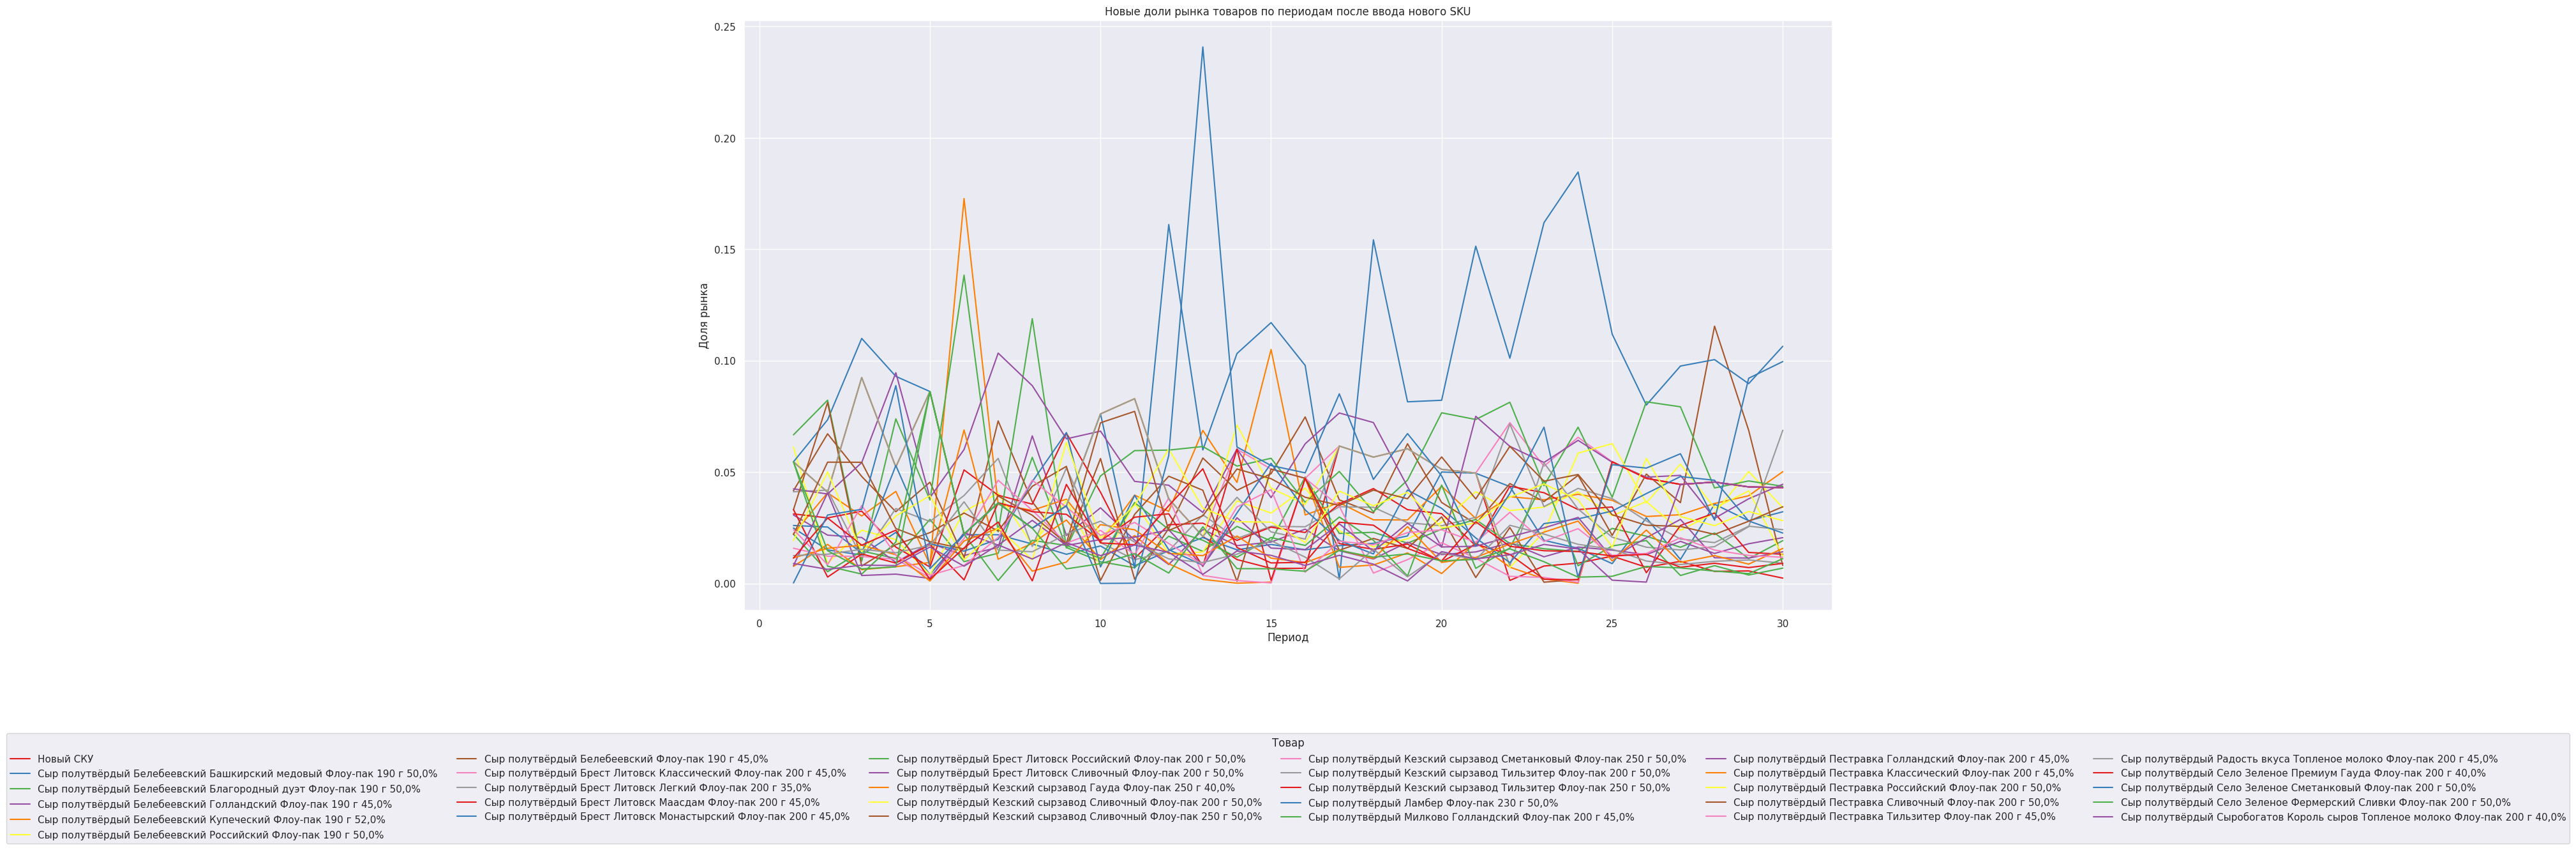

In [34]:
# Визуализация новых долей рынка
plt.figure(figsize=(22,12))
sns.lineplot(data=market_shares_new_melted, x='period', y='market_share', hue='SKU', palette='Set1')
plt.title('Новые доли рынка товаров по периодам после ввода нового SKU')
plt.xlabel('Период')
plt.ylabel('Доля рынка')
# plt.legend(title='Товар')
# Перемещаем легенду вниз
plt.legend(title='Товар', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=6)  # ncol определяет количество столбцов
plt.show()
plt.show()

In [35]:
market_shares_new_melted_group = market_shares_new_melted.groupby('SKU')['market_share'].sum()
market_shares_new_melted_group

SKU
Новый СКУ                                                                       1.0271724090
Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%            0.6411225783
Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%              0.6020958458
Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%                   0.5792359543
Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%                    1.2680725452
Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%                    0.8711365548
Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%                               1.3009349724
Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%                 1.5691106165
Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%                       0.9199554968
Сыр полутвёрдый Брест Литовск Маасдам Флоу-пак 200 г 45,0%                      0.8841666203
Сыр полутвёрдый Брест Литовск Монастырский Флоу-пак 200 г 45,0%                 2.6619953211
Сыр полутвёрдый Брест Литовск Российский Флоу-пак 200 г 50,0%                   1.7472800119
Сыр полутвёрдый Брест Литовск Сливочный Флоу-пак 200 г 50,0%                    1.6644901911
Сыр полутвёрдый Кезский сырзавод Гауда Флоу-пак 250 г 40,0%                     0.6047534451
Сыр полутвёрдый Кезский сырзавод Сливочный Флоу-пак 200 г 50,0%                 1.4201228579
Сыр полутвёрдый Кезский сырзавод Сливочный Флоу-пак 250 г 50,0%                 0.9242929433
Сыр полутвёрдый Кезский сырзавод Сметанковый Флоу-пак 250 г 50,0%               0.6623495630
Сыр полутвёрдый Кезский сырзавод Тильзитер Флоу-пак 200 г 50,0%                 1.2817142778
Сыр полутвёрдый Кезский сырзавод Тильзитер Флоу-пак 250 г 50,0%                 0.7462658256
Сыр полутвёрдый Ламбер Флоу-пак 230 г 50,0%                                     0.8837808139
Сыр полутвёрдый Милково Голландский Флоу-пак 200 г 45,0%                        0.6034521974
Сыр полутвёрдый Пестравка Голландский Флоу-пак 200 г 45,0%                      0.5513066730
Сыр полутвёрдый Пестравка Классический Флоу-пак 200 г 45,0%                     0.4574623636
Сыр полутвёрдый Пестравка Российский Флоу-пак 200 г 50,0%                       0.9649375238
Сыр полутвёрдый Пестравка Сливочный Флоу-пак 200 г 50,0%                        1.1507246904
Сыр полутвёрдый Пестравка Тильзитер Флоу-пак 200 г 45,0%                        0.6125803016
Сыр полутвёрдый Радость вкуса Топленое молоко Флоу-пак 200 г 45,0%              0.4445935220
Сыр полутвёрдый Село Зеленое Премиум Гауда Флоу-пак 200 г 40,0%                 0.5399416058
Сыр полутвёрдый Село Зеленое Сметанковый Флоу-пак 200 г 50,0%                   1.5003088196
Сыр полутвёрдый Село Зеленое Фермерский Сливки Флоу-пак 200 г 50,0%             0.4576789009
Сыр полутвёрдый Сыробогатов Король сыров Топленое молоко Флоу-пак 200 г 40,0%   0.4569645579
Name: market_share, dtype: float64

In [51]:
# Добавляем элемент в начало с помощью pd.concat
# del true_pred
true_pred_new = pd.concat([pd.Series({'Новый СКУ': 0}), true_pred]).copy()
true_pred_new.name = 'pred_market_share'
true_pred_new



Новый СКУ                                                                       0.0000000000
Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%            0.0251221704
Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%              0.0241133810
Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%                   0.0224622683
Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%                    0.0504147747
Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%                    0.0345268140
Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%                               0.0525845334
Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%                 0.0633393443
Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%                       0.0356018790
Сыр полутвёрдый Брест Литовск Маасдам Флоу-пак 200 г 45,0%                      0.0336362930
Сыр полутвёрдый Брест Литовск Монастырский Флоу-пак 200 г 45,0%                 0.0964966236
Сыр полутвёрдый Брест Литовск Российский Флоу-пак 200 г 50,0%                   0.0690546961
Сыр полутвёрдый Брест Литовск Сливочный Флоу-пак 200 г 50,0%                    0.0647388999
Сыр полутвёрдый Кезский сырзавод Гауда Флоу-пак 250 г 40,0%                     0.0100320976
Сыр полутвёрдый Кезский сырзавод Сливочный Флоу-пак 200 г 50,0%                 0.0210401165
Сыр полутвёрдый Кезский сырзавод Сливочный Флоу-пак 250 г 50,0%                 0.0197854184
Сыр полутвёрдый Кезский сырзавод Сметанковый Флоу-пак 250 г 50,0%               0.0114883906
Сыр полутвёрдый Кезский сырзавод Тильзитер Флоу-пак 200 г 50,0%                 0.0141771450
Сыр полутвёрдый Кезский сырзавод Тильзитер Флоу-пак 250 г 50,0%                 0.0125182599
Сыр полутвёрдый Ламбер Флоу-пак 230 г 50,0%                                     0.0350245658
Сыр полутвёрдый Милково Голландский Флоу-пак 200 г 45,0%                        0.0166694317
Сыр полутвёрдый Пестравка Голландский Флоу-пак 200 г 45,0%                      0.0209601985
Сыр полутвёрдый Пестравка Классический Флоу-пак 200 г 45,0%                     0.0175359927
Сыр полутвёрдый Пестравка Российский Флоу-пак 200 г 50,0%                       0.0375079346
Сыр полутвёрдый Пестравка Сливочный Флоу-пак 200 г 50,0%                        0.0445210632
Сыр полутвёрдый Пестравка Тильзитер Флоу-пак 200 г 45,0%                        0.0232340939
Сыр полутвёрдый Радость вкуса Топленое молоко Флоу-пак 200 г 45,0%              0.0171549680
Сыр полутвёрдый Село Зеленое Премиум Гауда Флоу-пак 200 г 40,0%                 0.0204988712
Сыр полутвёрдый Село Зеленое Сметанковый Флоу-пак 200 г 50,0%                   0.0593855593
Сыр полутвёрдый Село Зеленое Фермерский Сливки Флоу-пак 200 г 50,0%             0.0092515291
Сыр полутвёрдый Сыробогатов Король сыров Топленое молоко Флоу-пак 200 г 40,0%   0.0101927494
Name: pred_market_share, dtype: float64

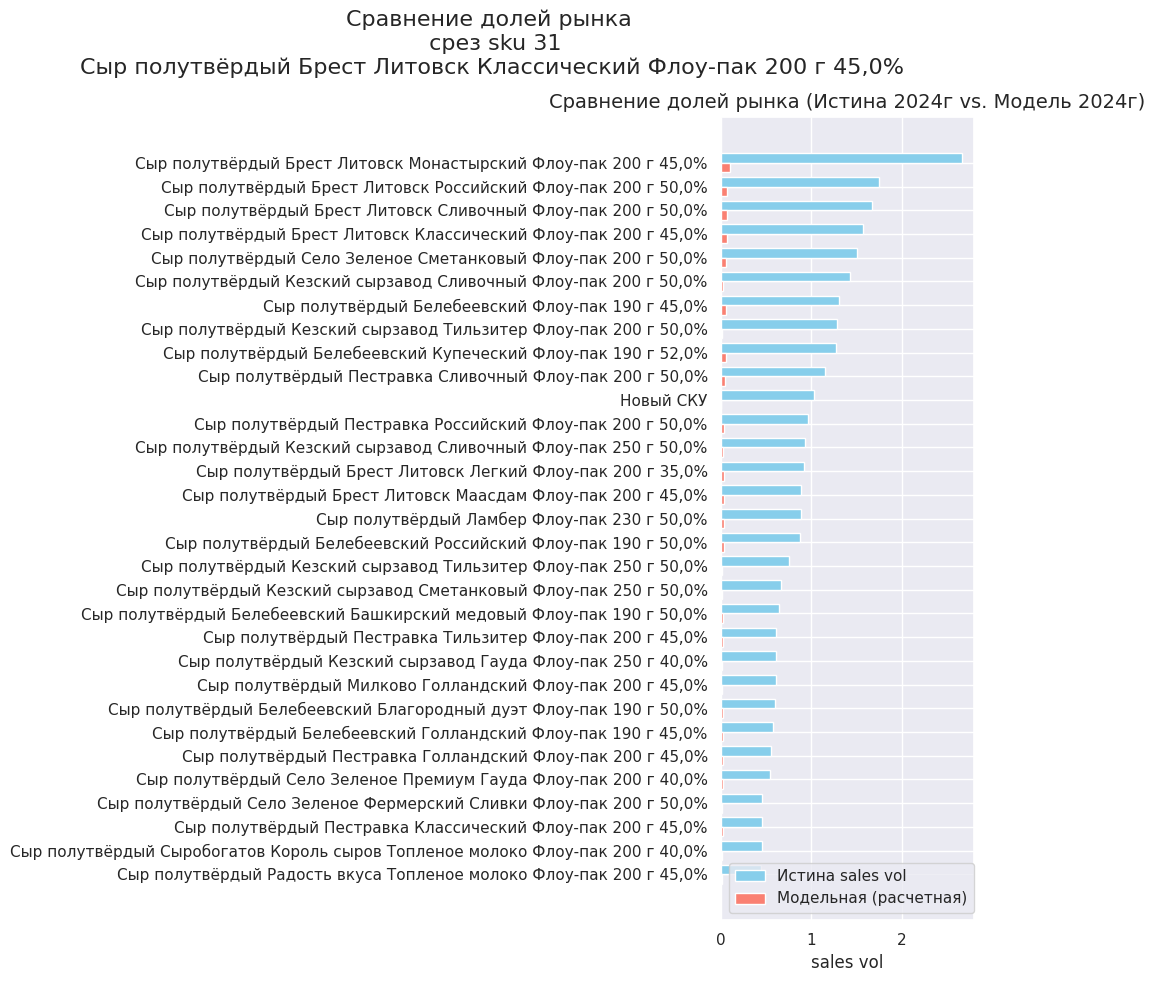

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='Истина sales vol')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='Модельная (расчетная)')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('sales vol')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax


# Извлечение данных для построения диаграмм
sizes_org = market_shares_new_melted_group.to_frame()['market_share'].values
sizes_pred = true_pred_new.to_frame()['pred_market_share'].values
labels_org = market_shares_new_melted_group.index.values
top_25=31
# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 10))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка (Истина 2024г vs. Модель 2024г)', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка \n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()
